In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os
from copy import deepcopy

In [82]:
plt.style.use(['science'])
plt.rcParams['text.usetex'] = True
TOSAVE = True
if TOSAVE:
    plt.rcParams.update({'figure.dpi': '600'})
else:
    plt.rcParams.update({'figure.dpi': '180'})

In [83]:
def myplot(path, labels, xlabel='Epoch', ylabel='None', xlims=None, ylims=None, window=1):
    plt.figure()
    p = 'output_data'
    saved_p = deepcopy(path)
    path = os.path.join(p, path)
    paths = os.listdir(path)
    paths = sorted(paths)
    print(paths)
    paths = [os.path.join(path, p) for p in paths if p.endswith('.csv')]

    for path in paths:
        data = pd.read_csv(path)
        steps = len(data)
        data['Value'] = data['Value'].rolling(window=window).mean()
        plt.plot(range(steps), data['Value'], label=labels.pop(0))

    if ylims is not None:
        plt.ylim(ylims)
    if xlims is not None:
        xlims[0] += window -1
        plt.xlim(xlims)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    ax = plt.gca()
    plt.text(0.93, 1.05, '$w =$ '+str(window), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize=8)
    saved_p = saved_p.replace('/', '_')
    if TOSAVE:
        plt.savefig('plots/' + saved_p + '.png')
    plt.show()

# Data pre-processing

['run-lemmatized-tag-test_weighted avg_f1-score.csv', 'run-lowercase-tag-test_weighted avg_f1-score.csv', 'run-nothing-tag-test_weighted avg_f1-score.csv', 'run-stemmizer-tag-test_weighted avg_f1-score.csv']


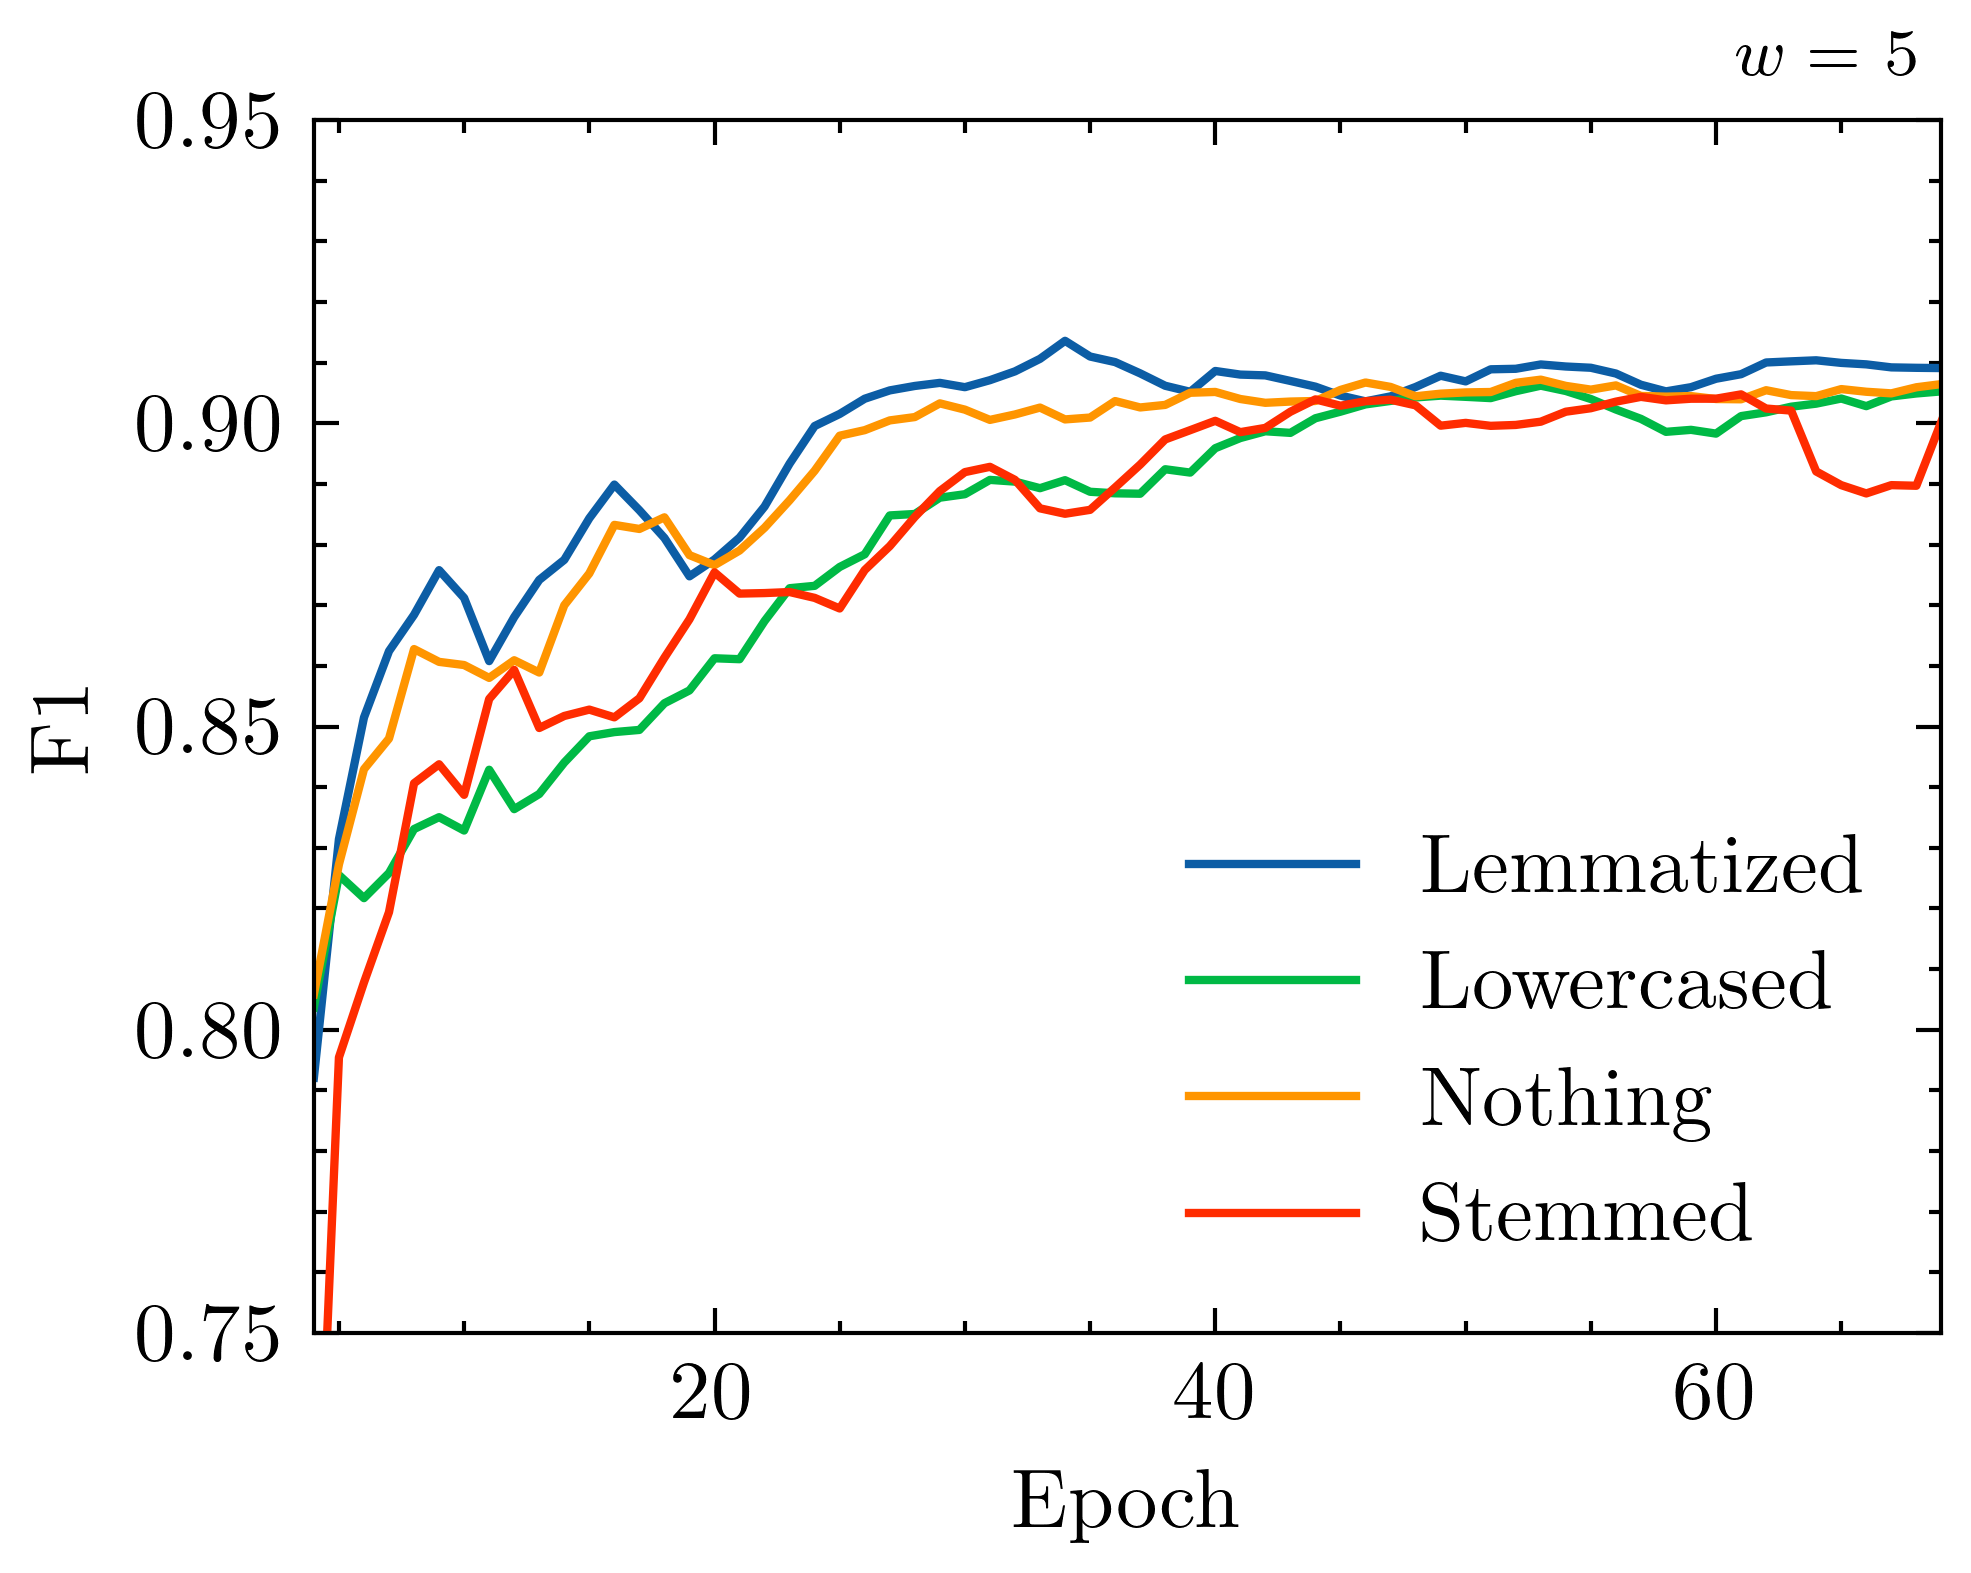

In [84]:
myplot('preprocessing/f1', ['Lemmatized', 'Lowercased', 'Nothing', 'Stemmed'], ylabel='F1', xlims = [0, 69], ylims=[0.75, 0.95], window=5)

['run-lemmatized-tag-test_B-AC_f1-score.csv', 'run-lowercase-tag-test_B-AC_f1-score.csv', 'run-nothing-tag-test_B-AC_f1-score.csv', 'run-stemmizer-tag-test_B-AC_f1-score.csv']


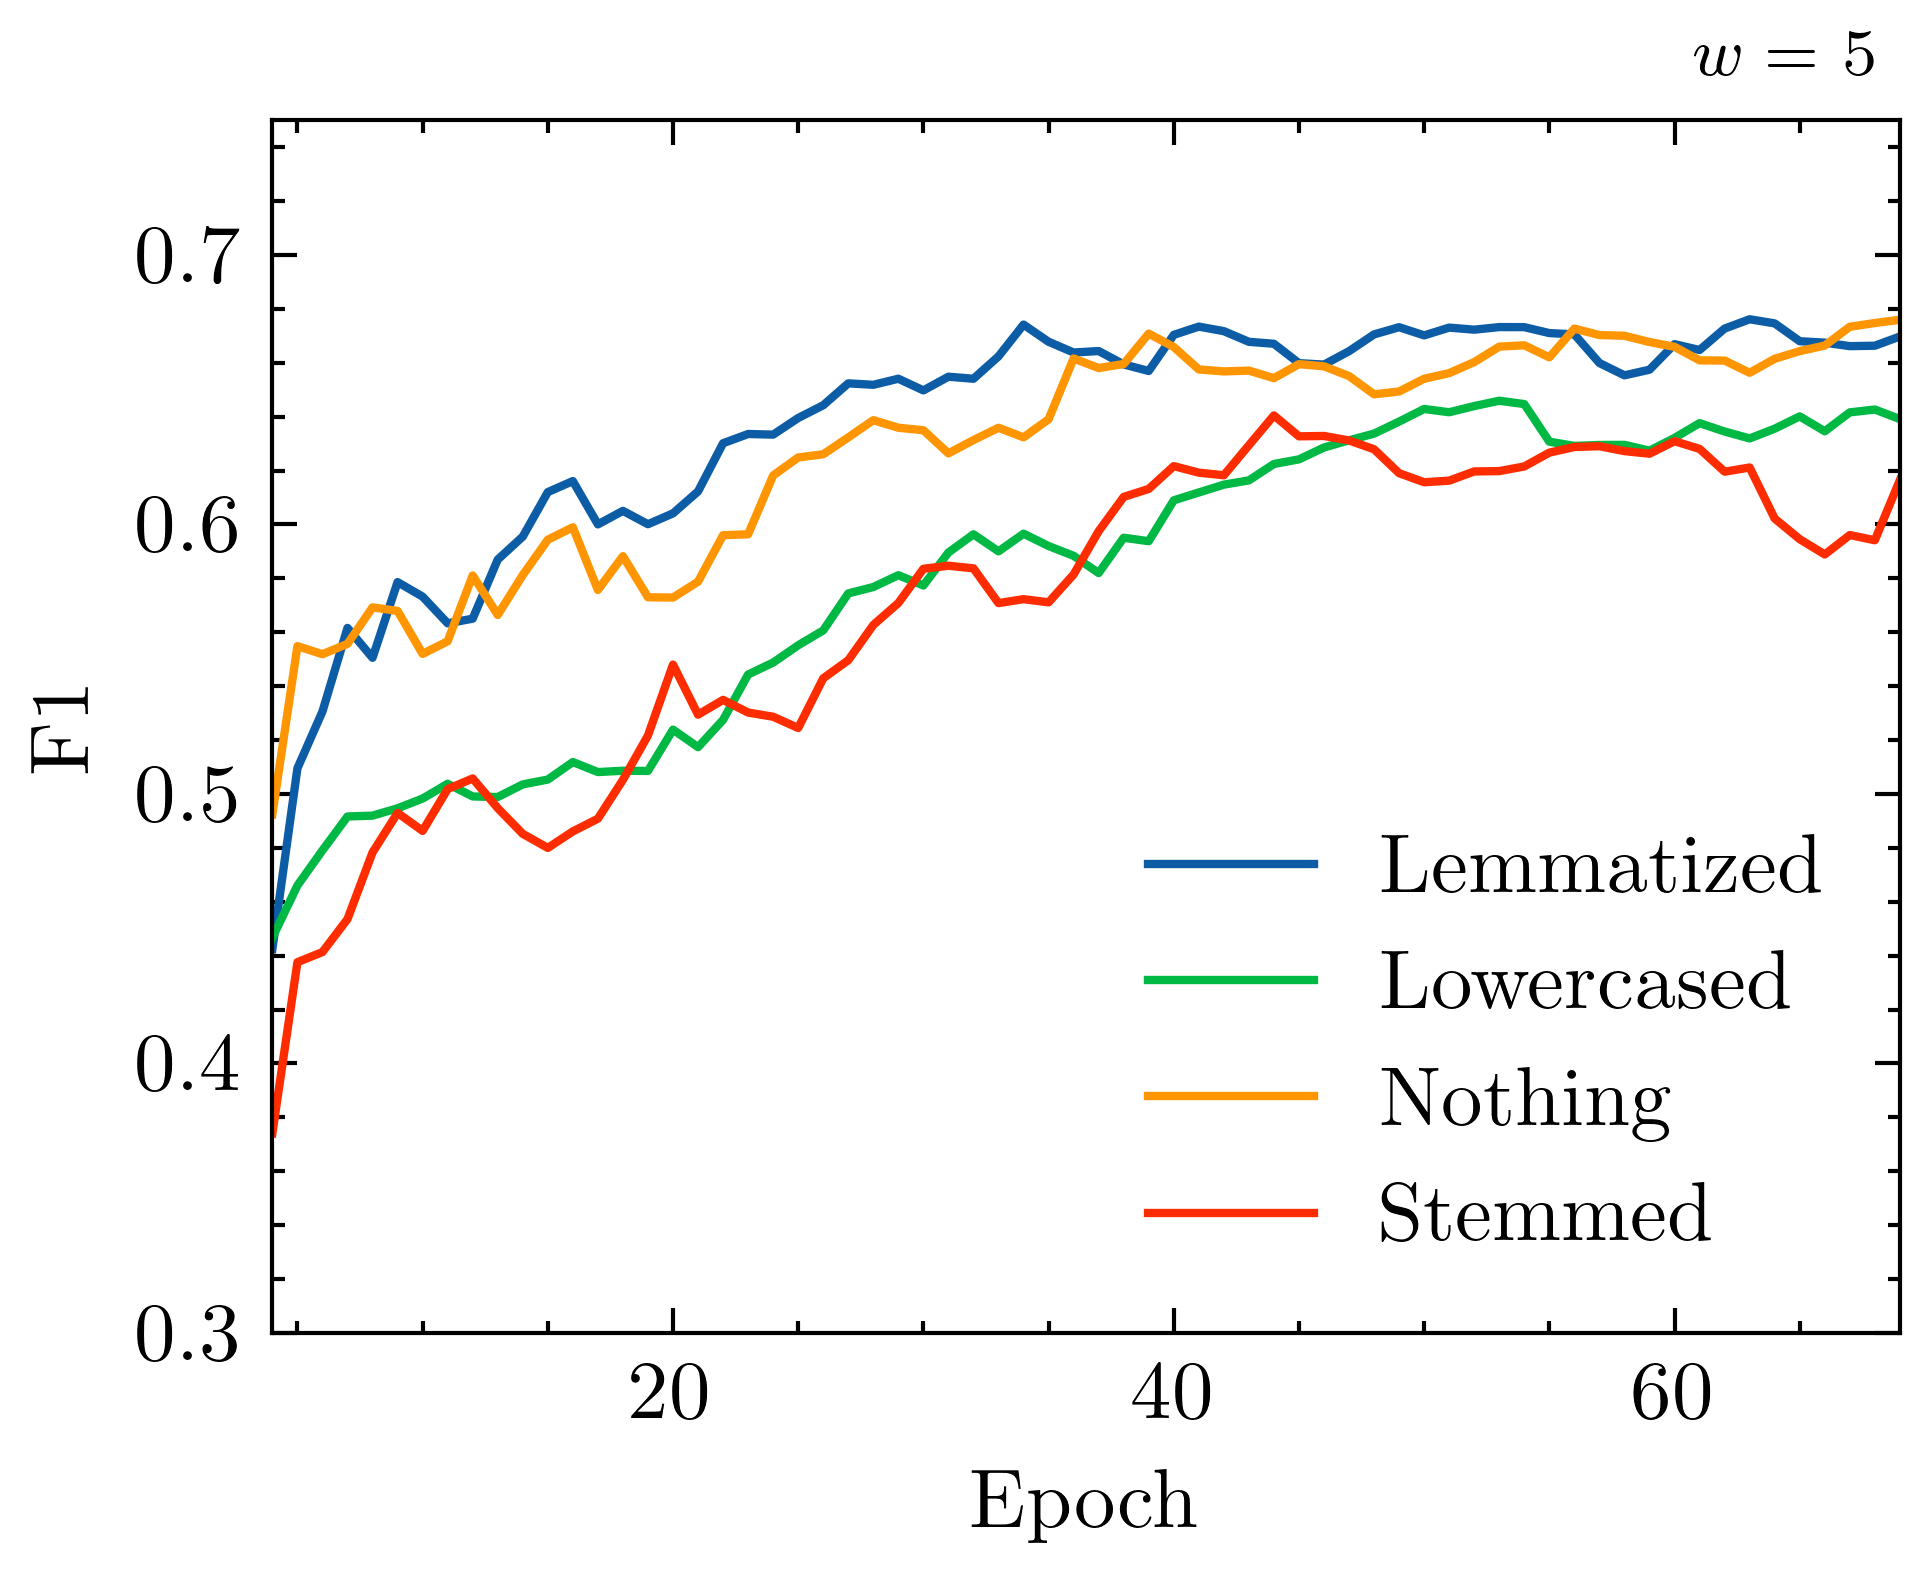

In [85]:
myplot('preprocessing/acf1', ['Lemmatized', 'Lowercased', 'Nothing', 'Stemmed'], ylabel='F1', xlims = [0, 69], ylims=[0.3, 0.75], window=5)

# Finetuning

['.DS_Store', 'run-bert-tag-eval_weighted avg_f1-score.csv', 'run-distilbert-tag-eval_weighted avg_f1-score.csv', 'run-distiledgpt2-tag-eval_weighted avg_f1-score.csv', 'run-stanford-tag-eval_weighted avg_f1-score.csv']


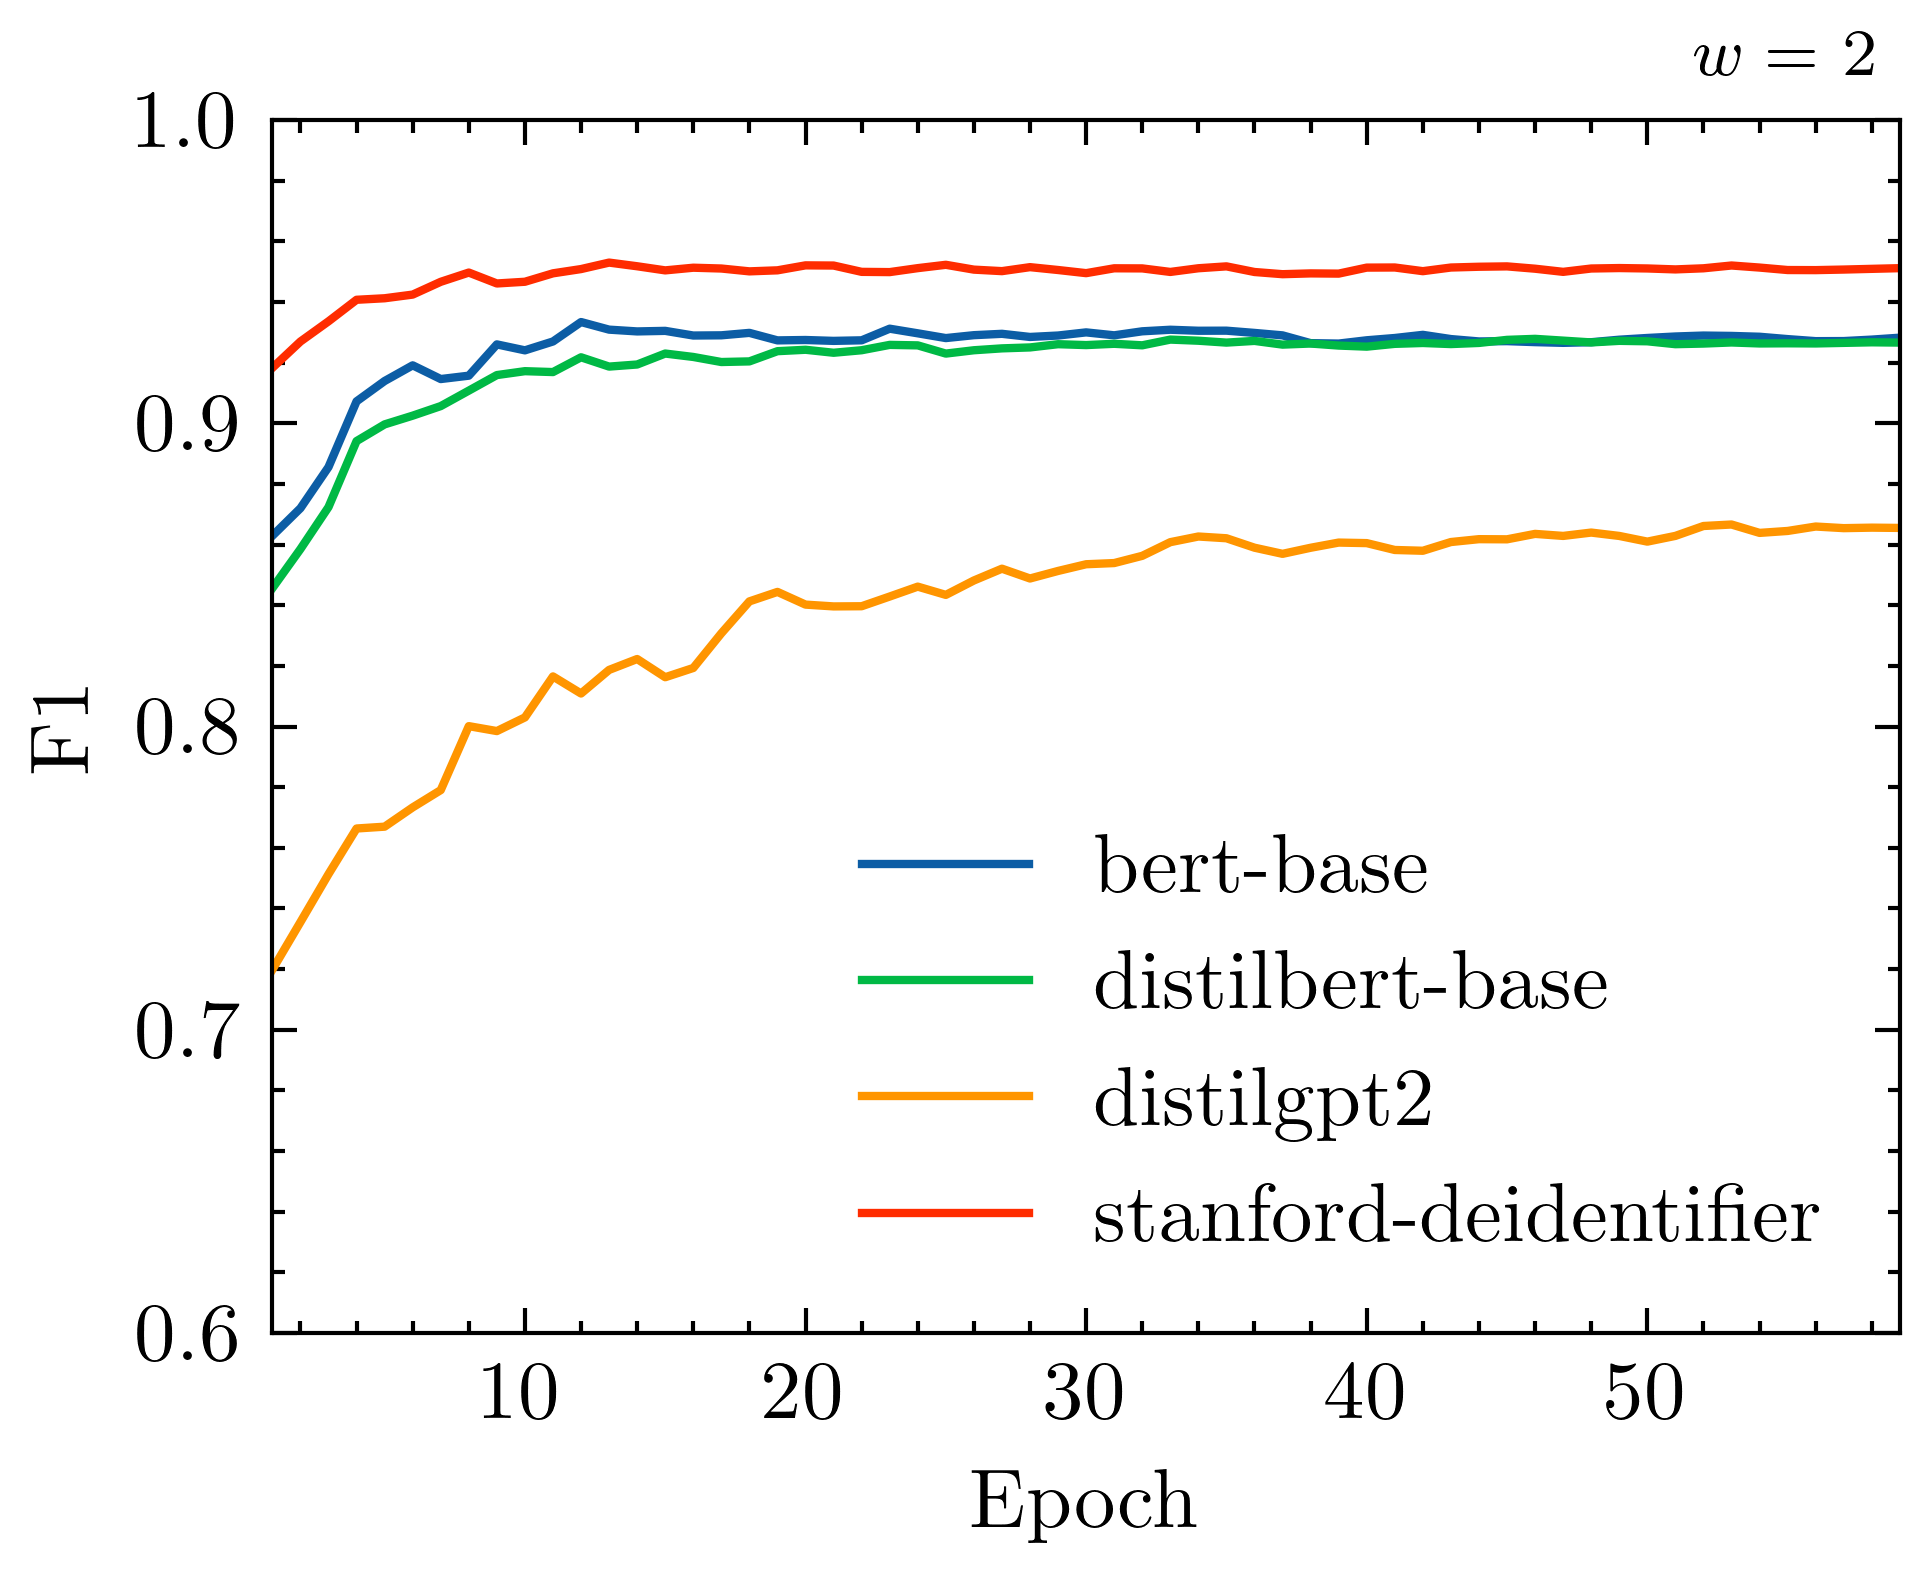

In [86]:
myplot('finetuned/f1', ['bert-base', 'distilbert-base', 'distilgpt2', 'stanford-deidentifier'], ylabel='F1', xlims = [0, 59], ylims=[0.6, 1], window = 2)

['run-bert-tag-eval_1_f1-score.csv', 'run-distilbert-tag-eval_1_f1-score.csv', 'run-distiledgpt2-tag-eval_1_f1-score.csv', 'run-stanford-tag-eval_1_f1-score.csv']


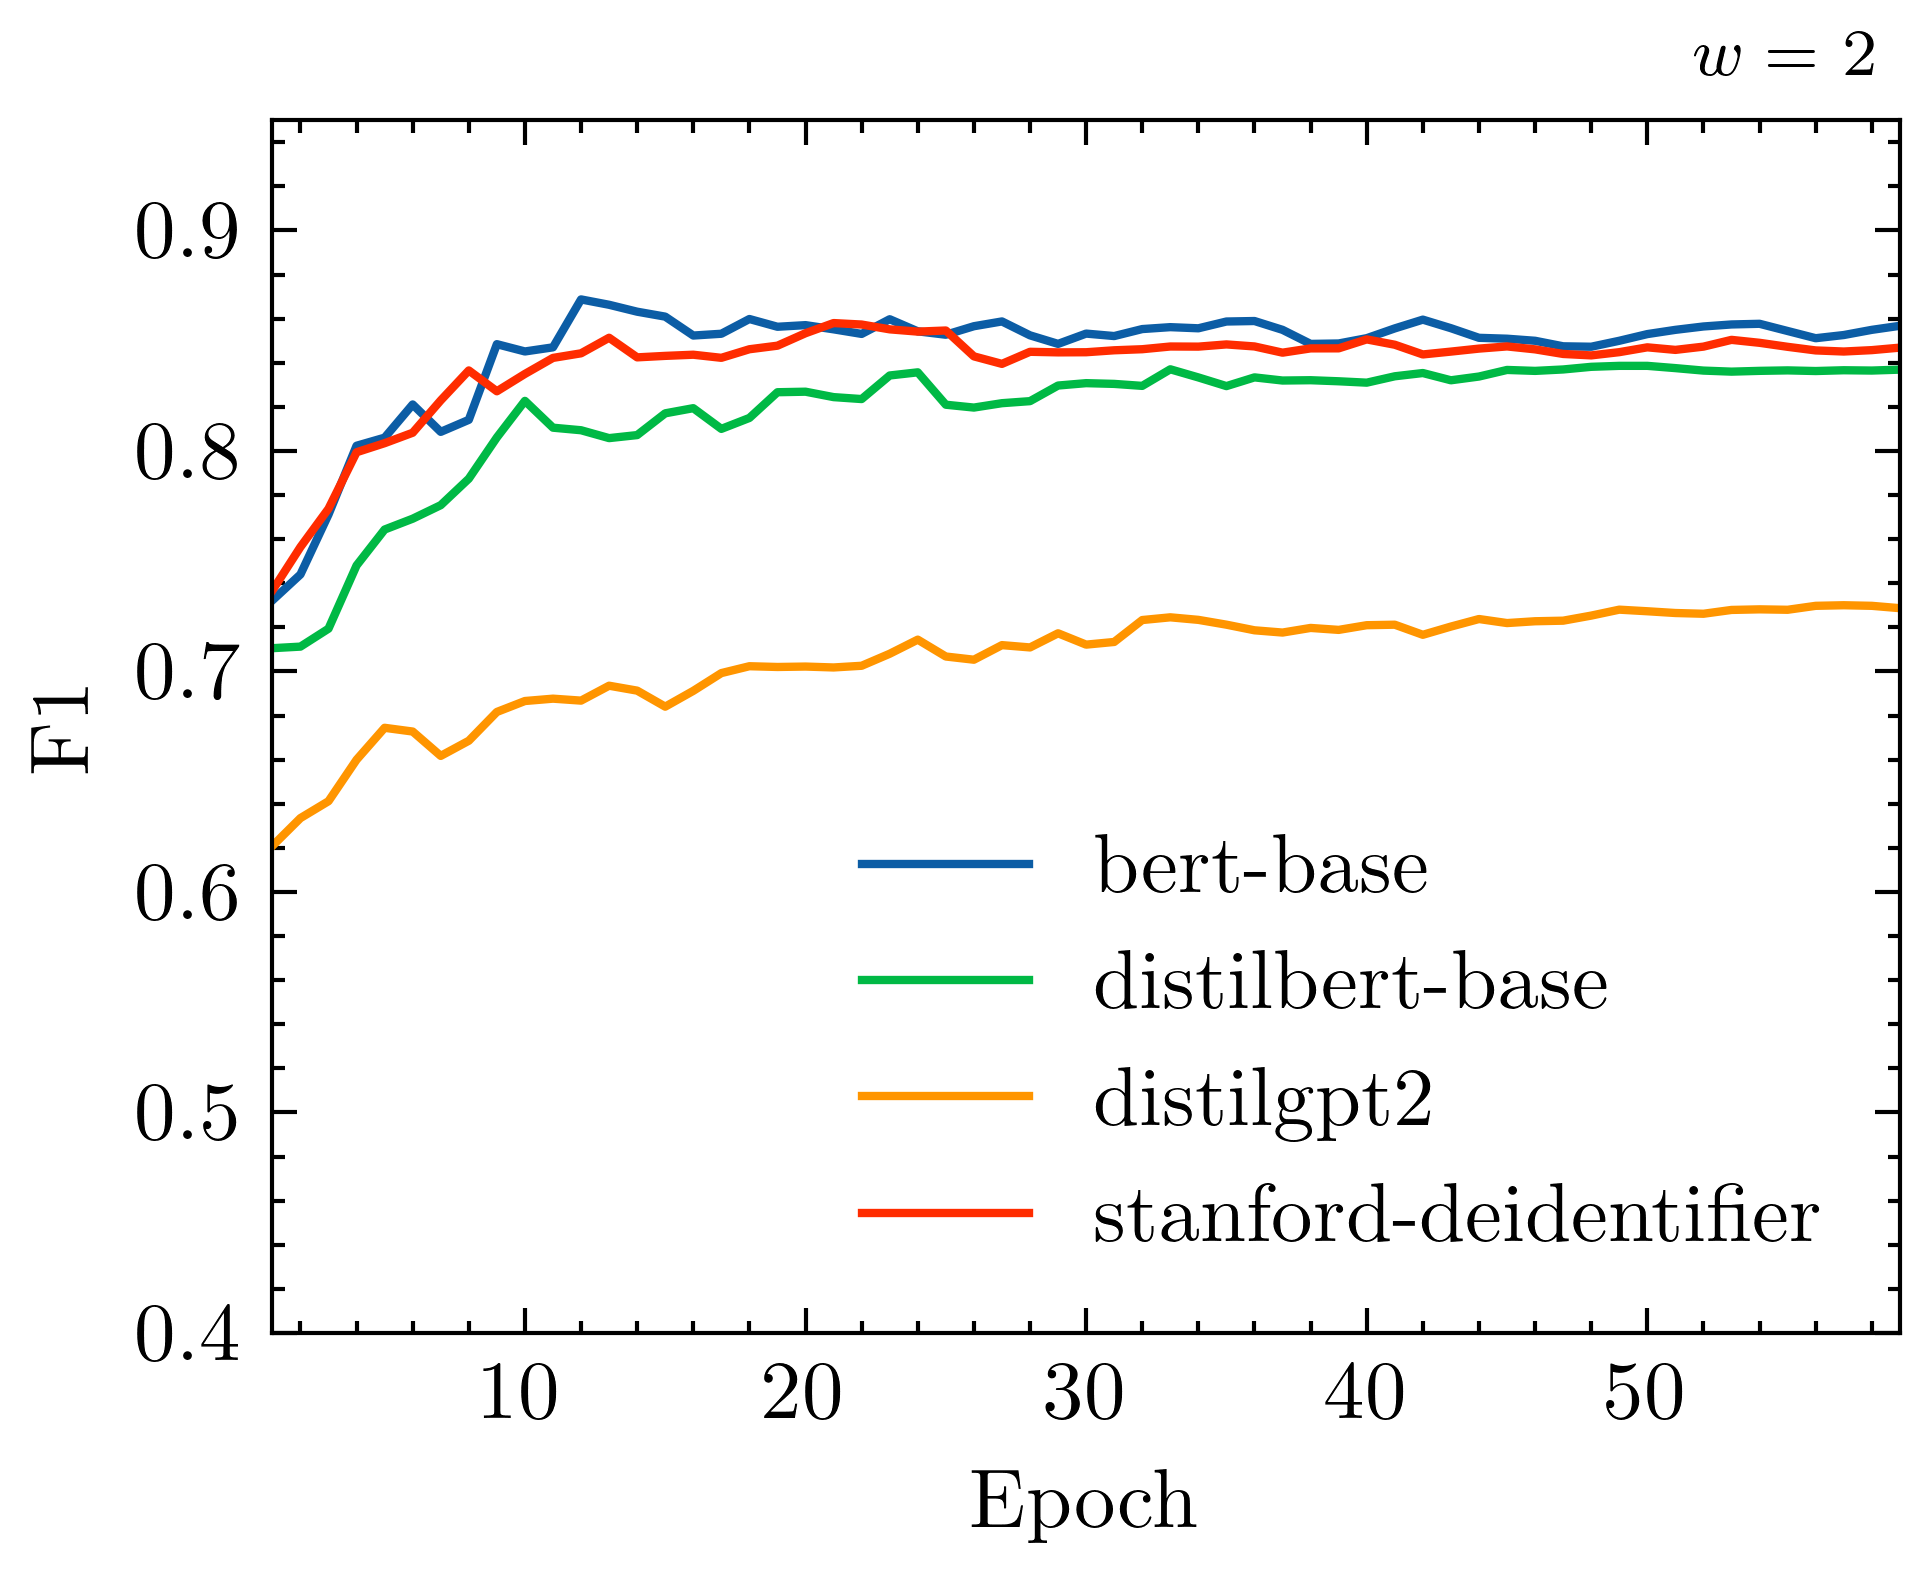

In [87]:
myplot('finetuned/acf1', ['bert-base', 'distilbert-base', 'distilgpt2', 'stanford-deidentifier'], ylabel='F1', xlims = [0, 59], ylims=[0.4, 0.95], window = 2)

# Loss functions

['run-cross_entropy-tag-test_weighted avg_f1-score.csv', 'run-hinge_loss-tag-test_weighted avg_f1-score.csv']


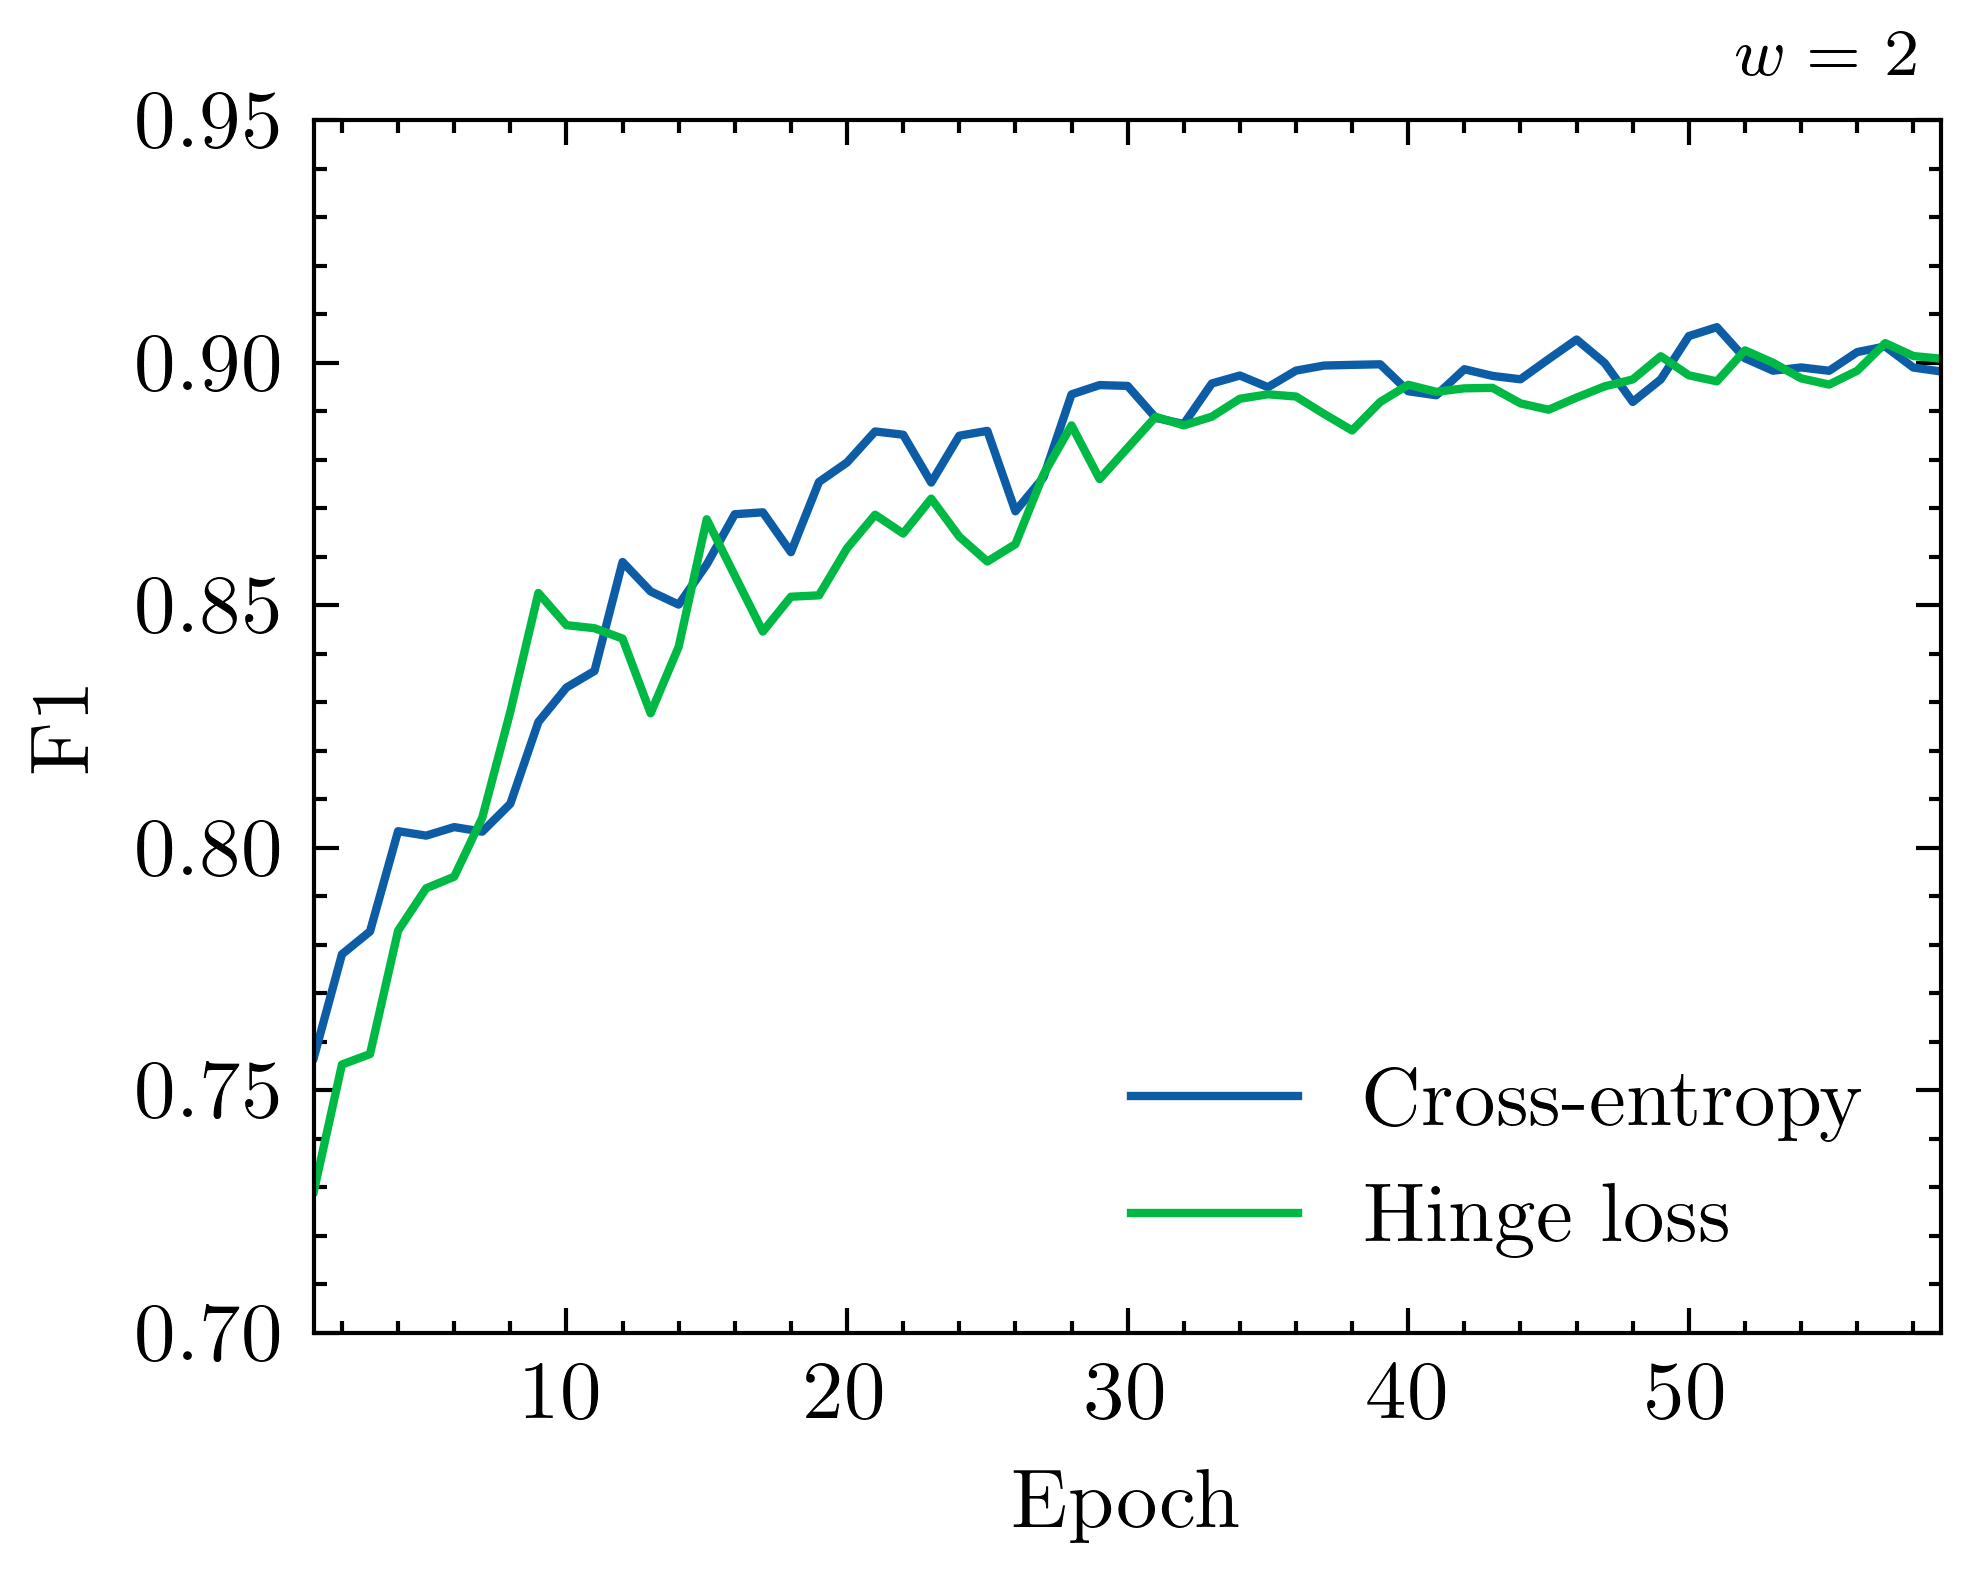

In [88]:
myplot('loss_functions/f1', ['Cross-entropy', 'Hinge loss'], ylabel='F1', xlims = [0, 59], ylims=[0.7, 0.95], window = 2)

['run-cross_entropy-tag-test_B-AC_f1-score.csv', 'run-hinge_loss-tag-test_B-AC_f1-score.csv']


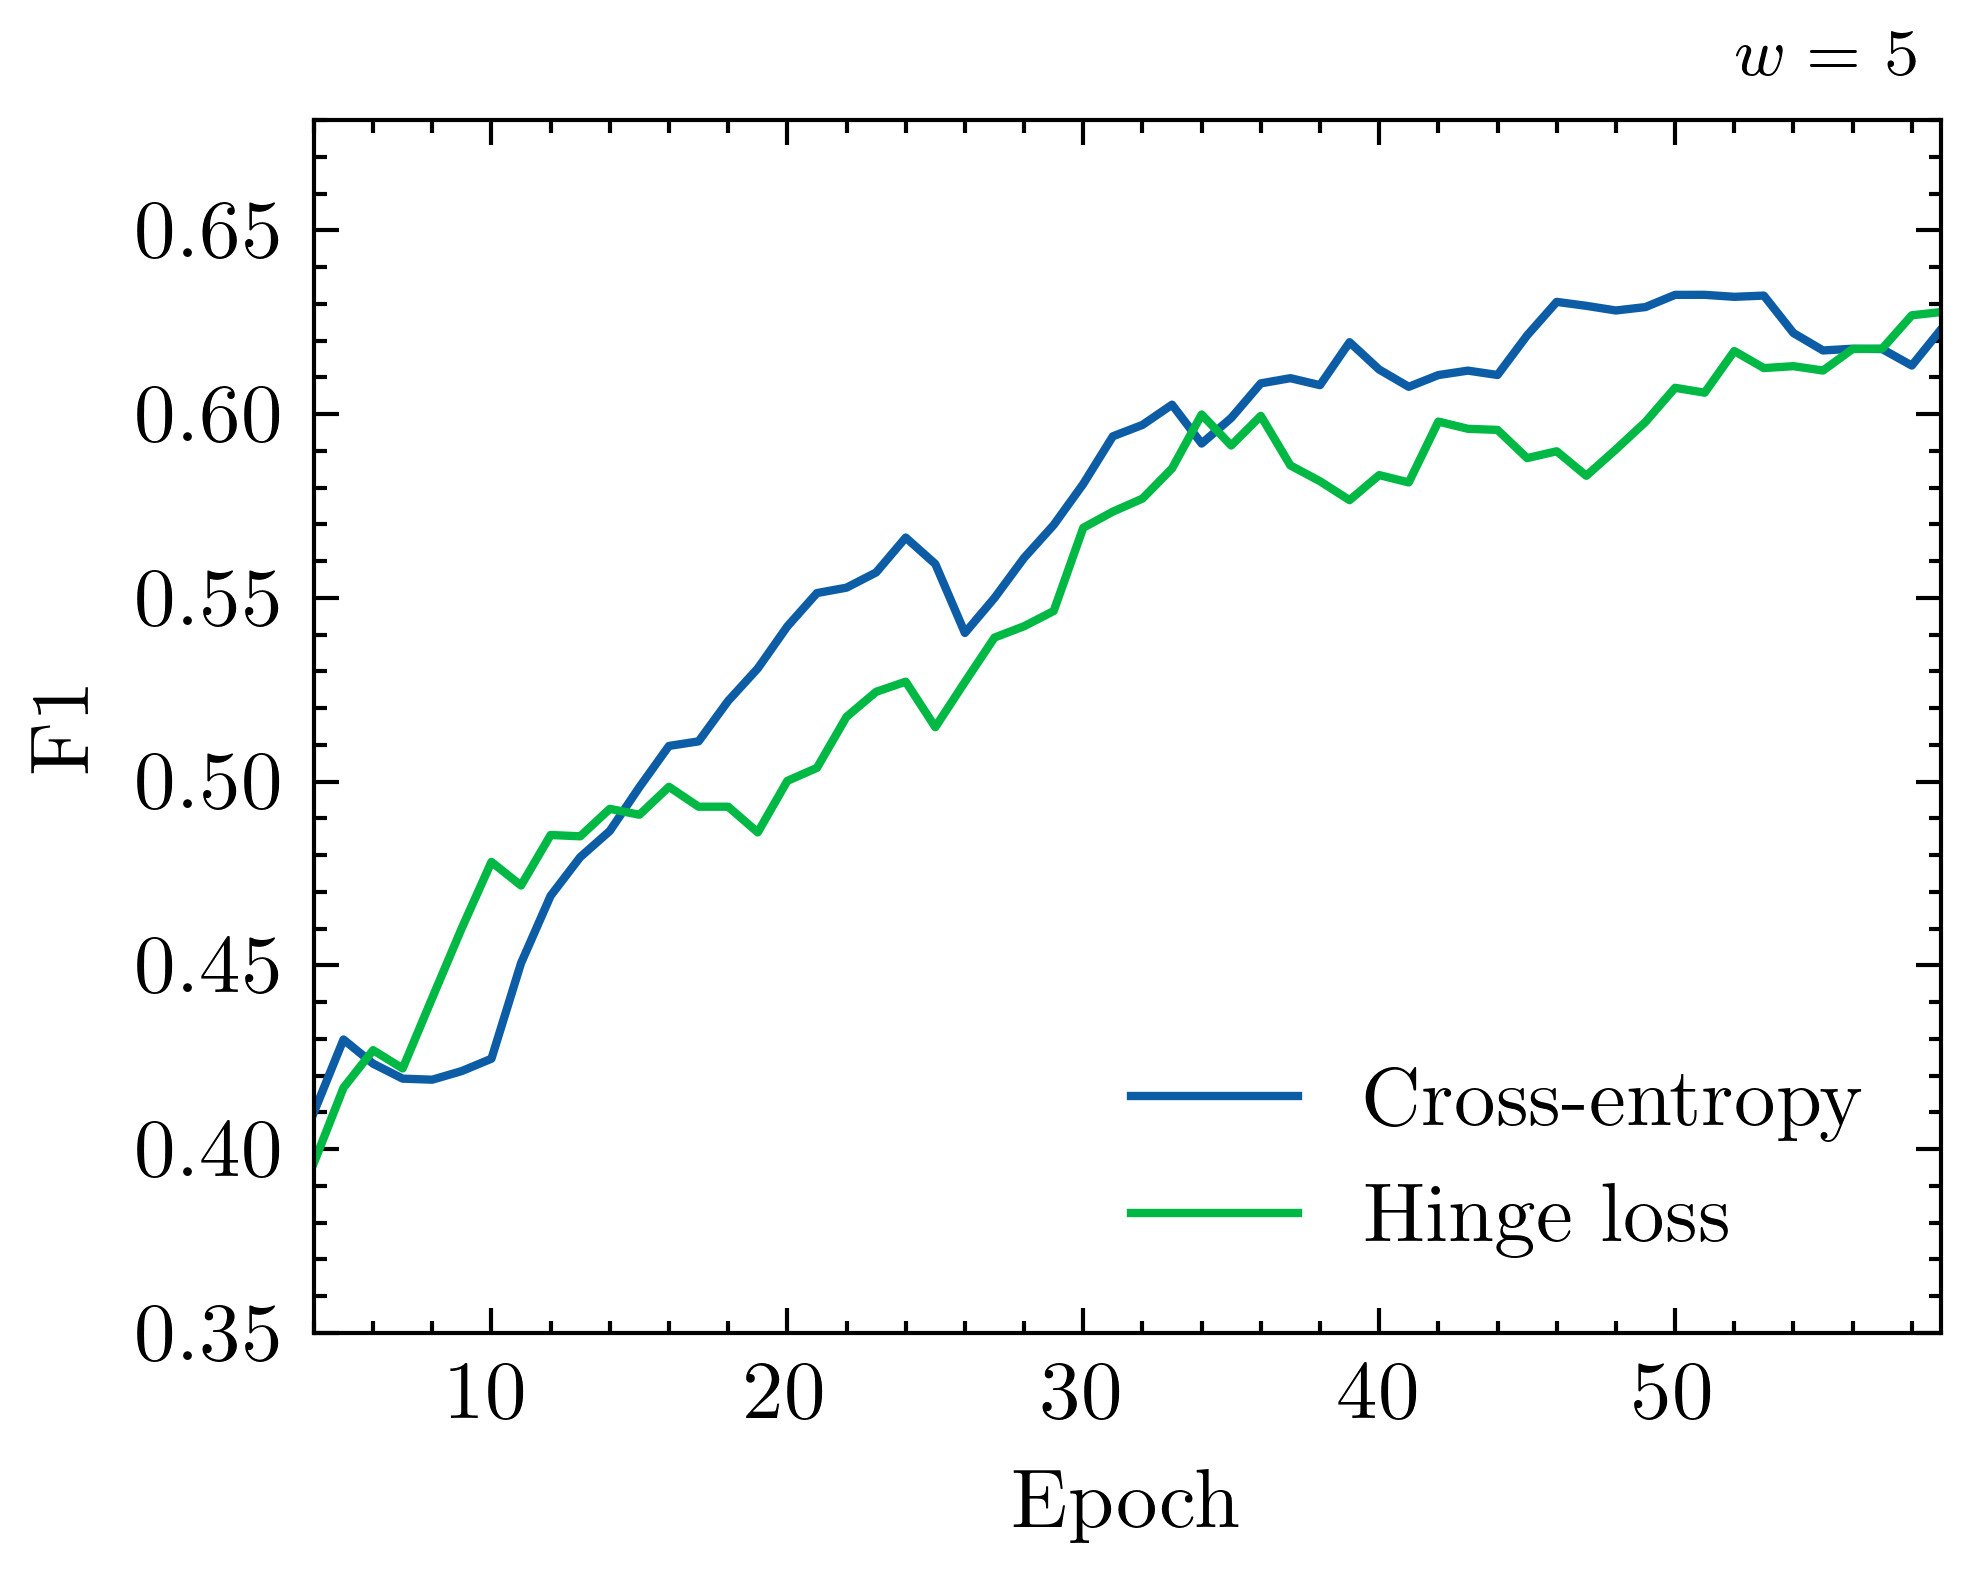

In [89]:
myplot('loss_functions/acf1', ['Cross-entropy', 'Hinge loss'], ylabel='F1', xlims = [0, 59], ylims=[0.35, 0.68], window = 5)

# Weights to loss function

['run-big_w-tag-eval_weighted avg_f1-score.csv', 'run-no_w-tag-eval_weighted avg_f1-score.csv', 'run-normal_w-tag-eval_weighted avg_f1-score.csv', 'run-w-tag-eval_weighted avg_f1-score.csv']


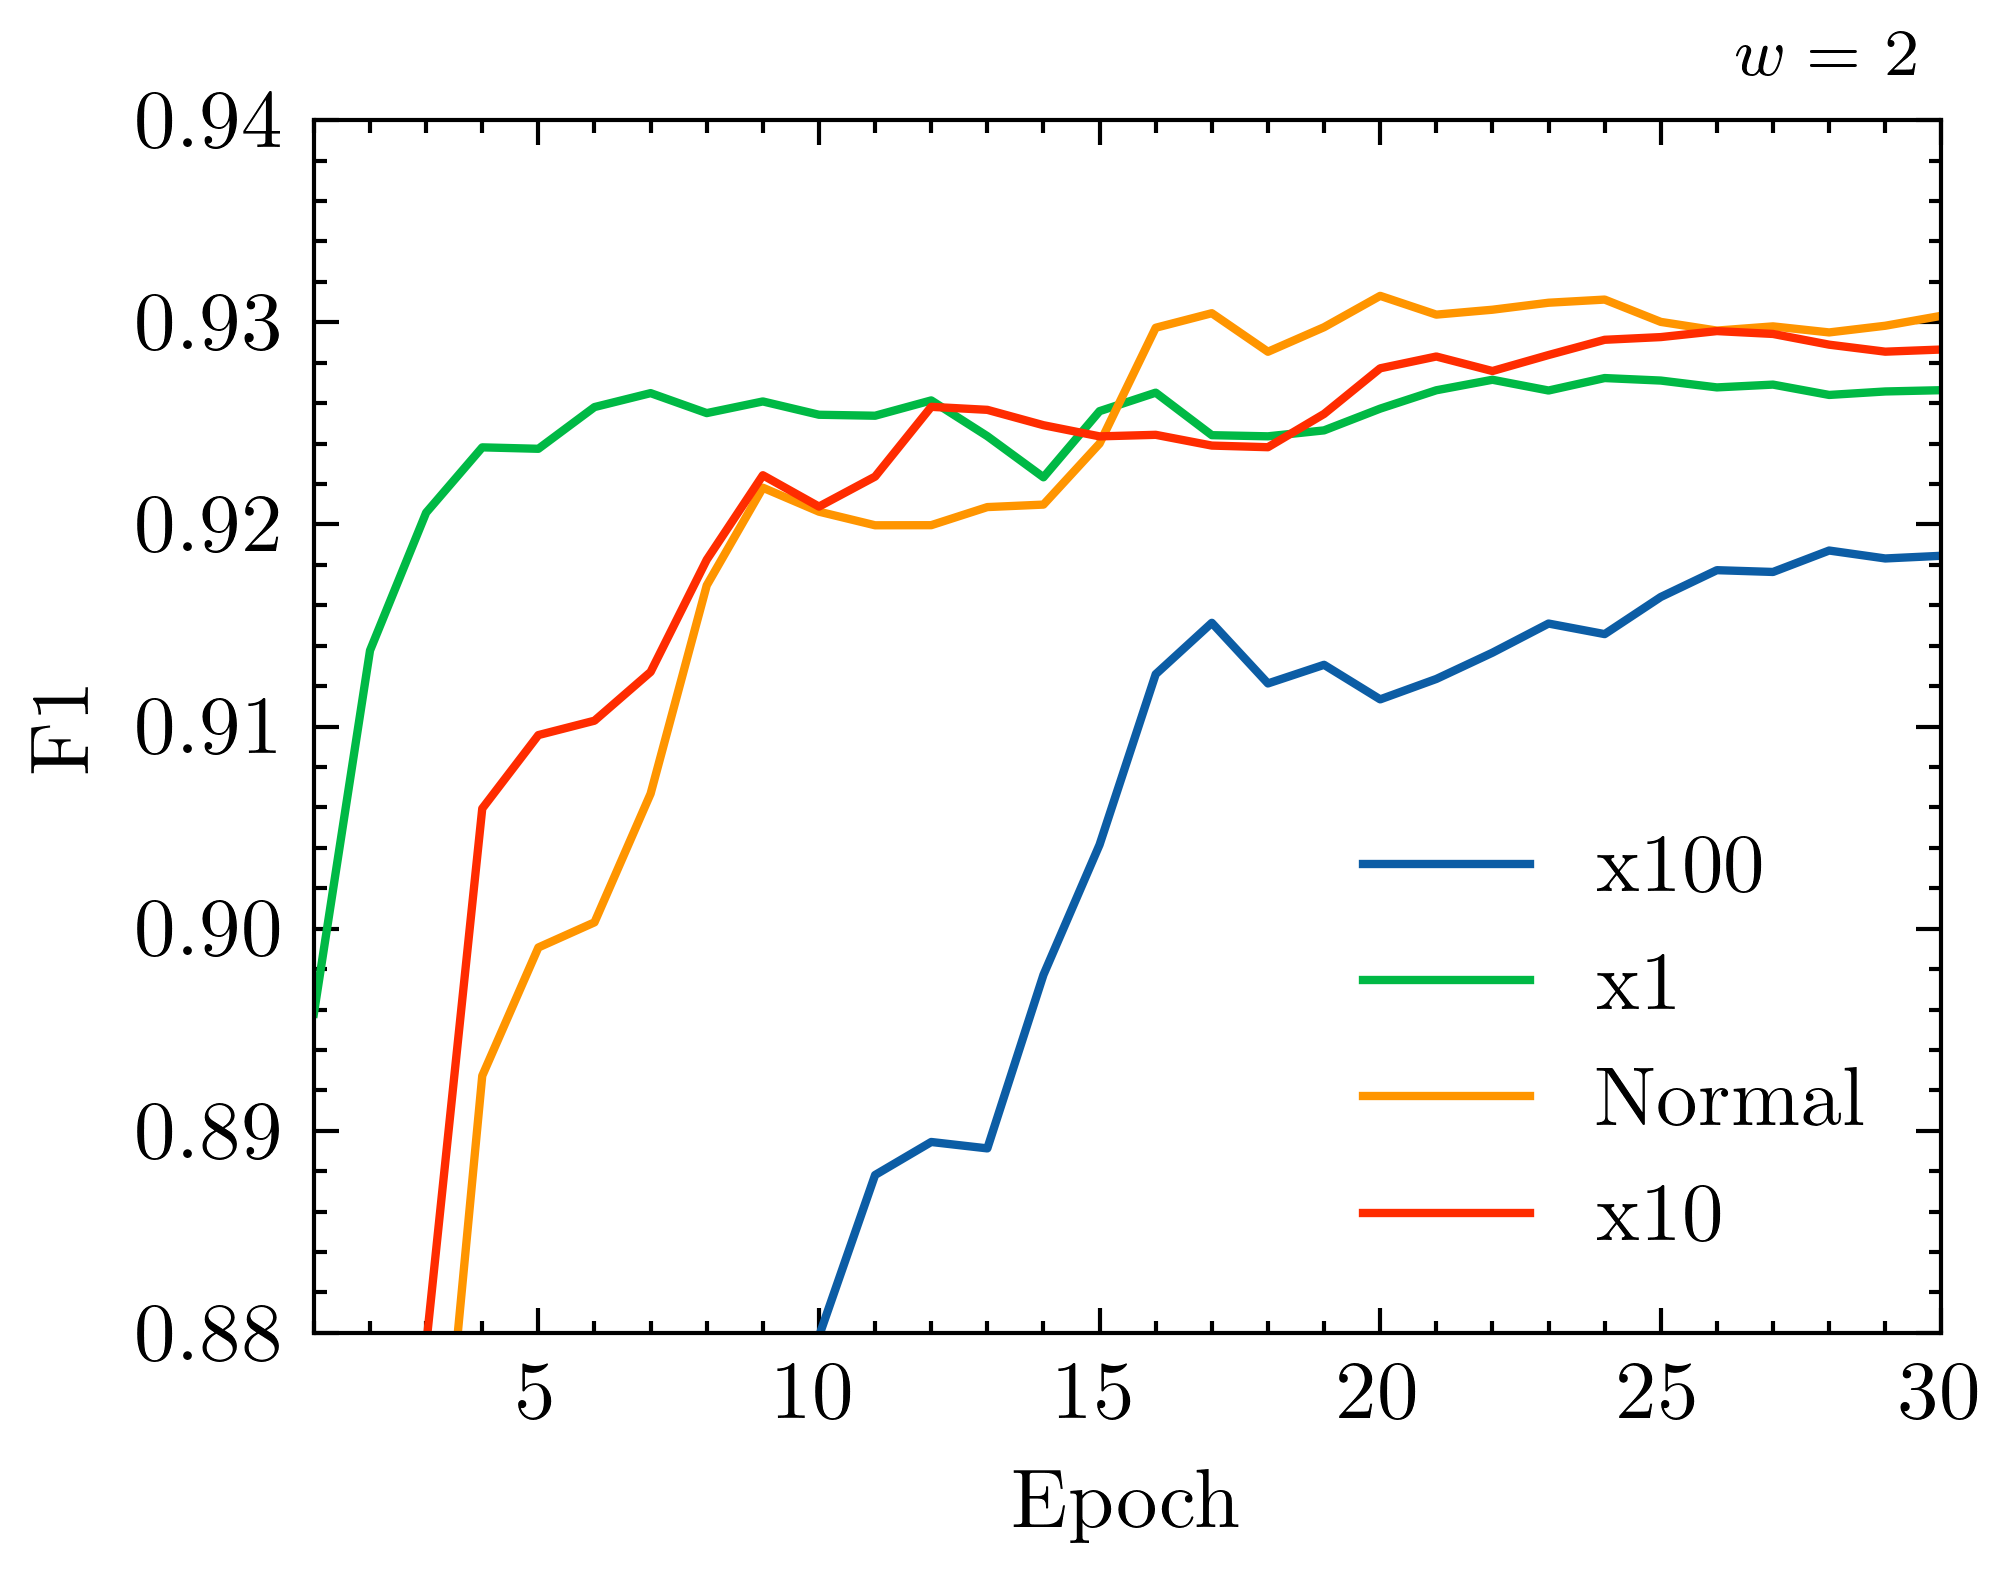

In [90]:
myplot('weights/f1', ['x100', 'x1', 'Normal', 'x10'], ylabel='F1', xlims = [0, 30], ylims=[0.88, 0.94], window = 2)

['run-big_w-tag-eval_1_f1-score.csv', 'run-no_w-tag-eval_1_f1-score.csv', 'run-normal_w-tag-eval_1_f1-score.csv', 'run-w-tag-eval_1_f1-score.csv']


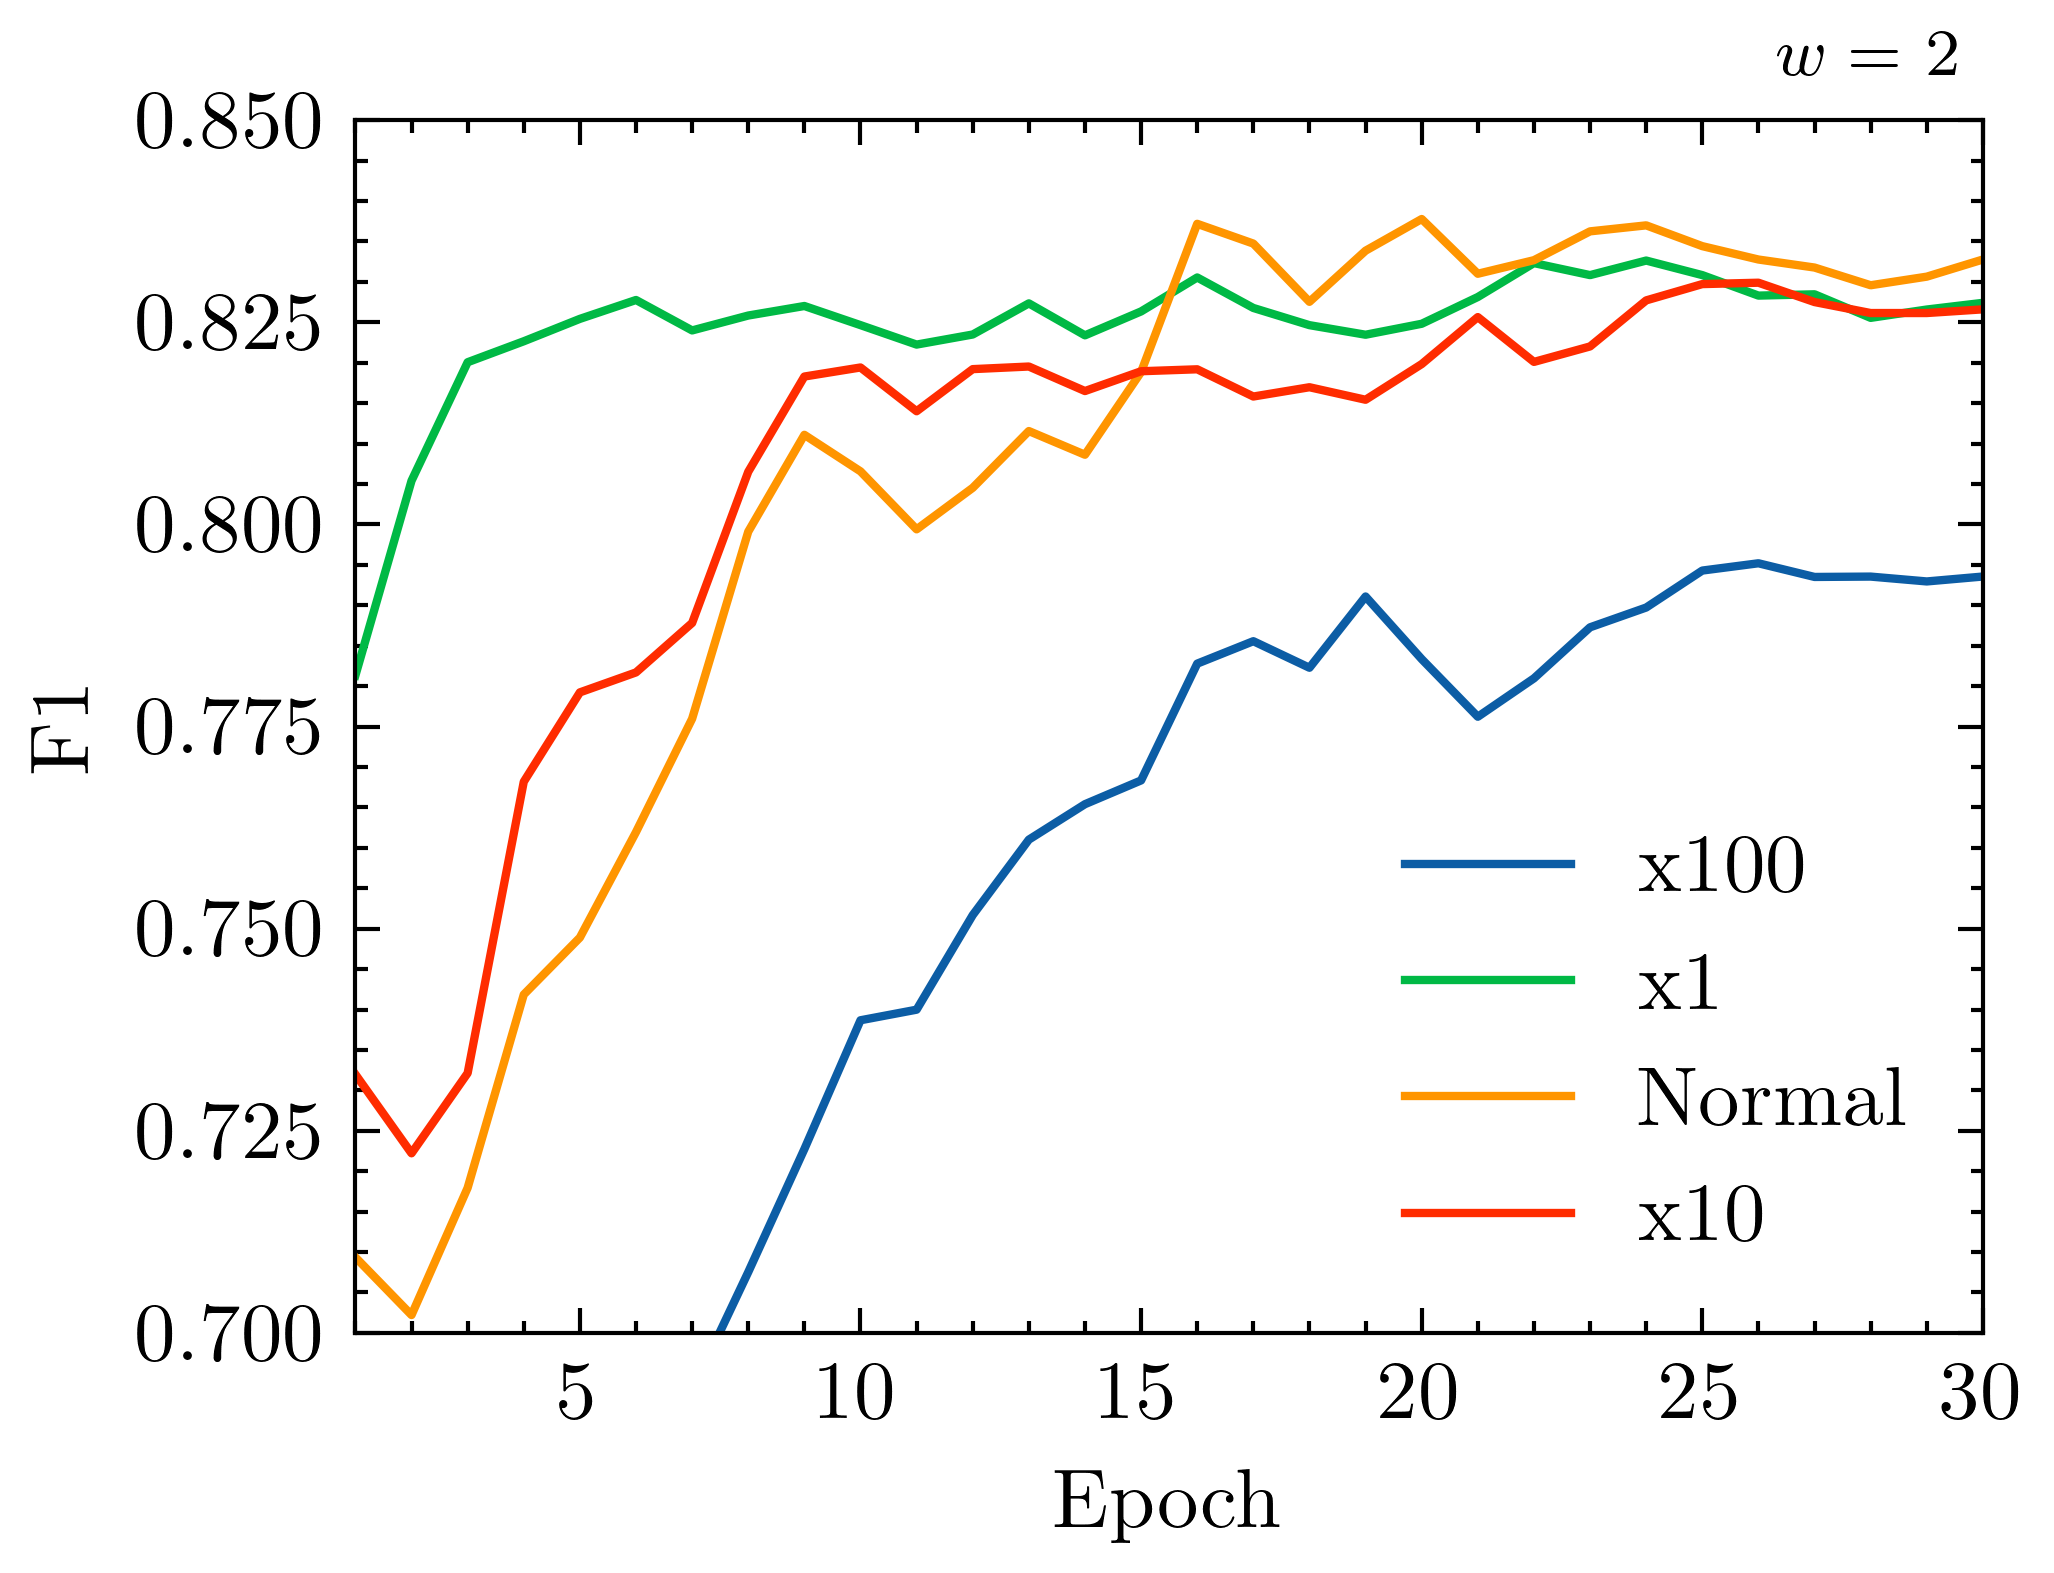

In [91]:
myplot('weights/acf1', ['x100', 'x1', 'Normal', 'x10'], ylabel='F1', xlims = [0, 30], ylims=[0.70, 0.85], window = 2)

# Optimizers

['run-AdamW-tag-test_weighted avg_f1-score.csv', 'run-adam-tag-test_weighted avg_f1-score.csv', 'run-sgd-tag-test_weighted avg_f1-score.csv']


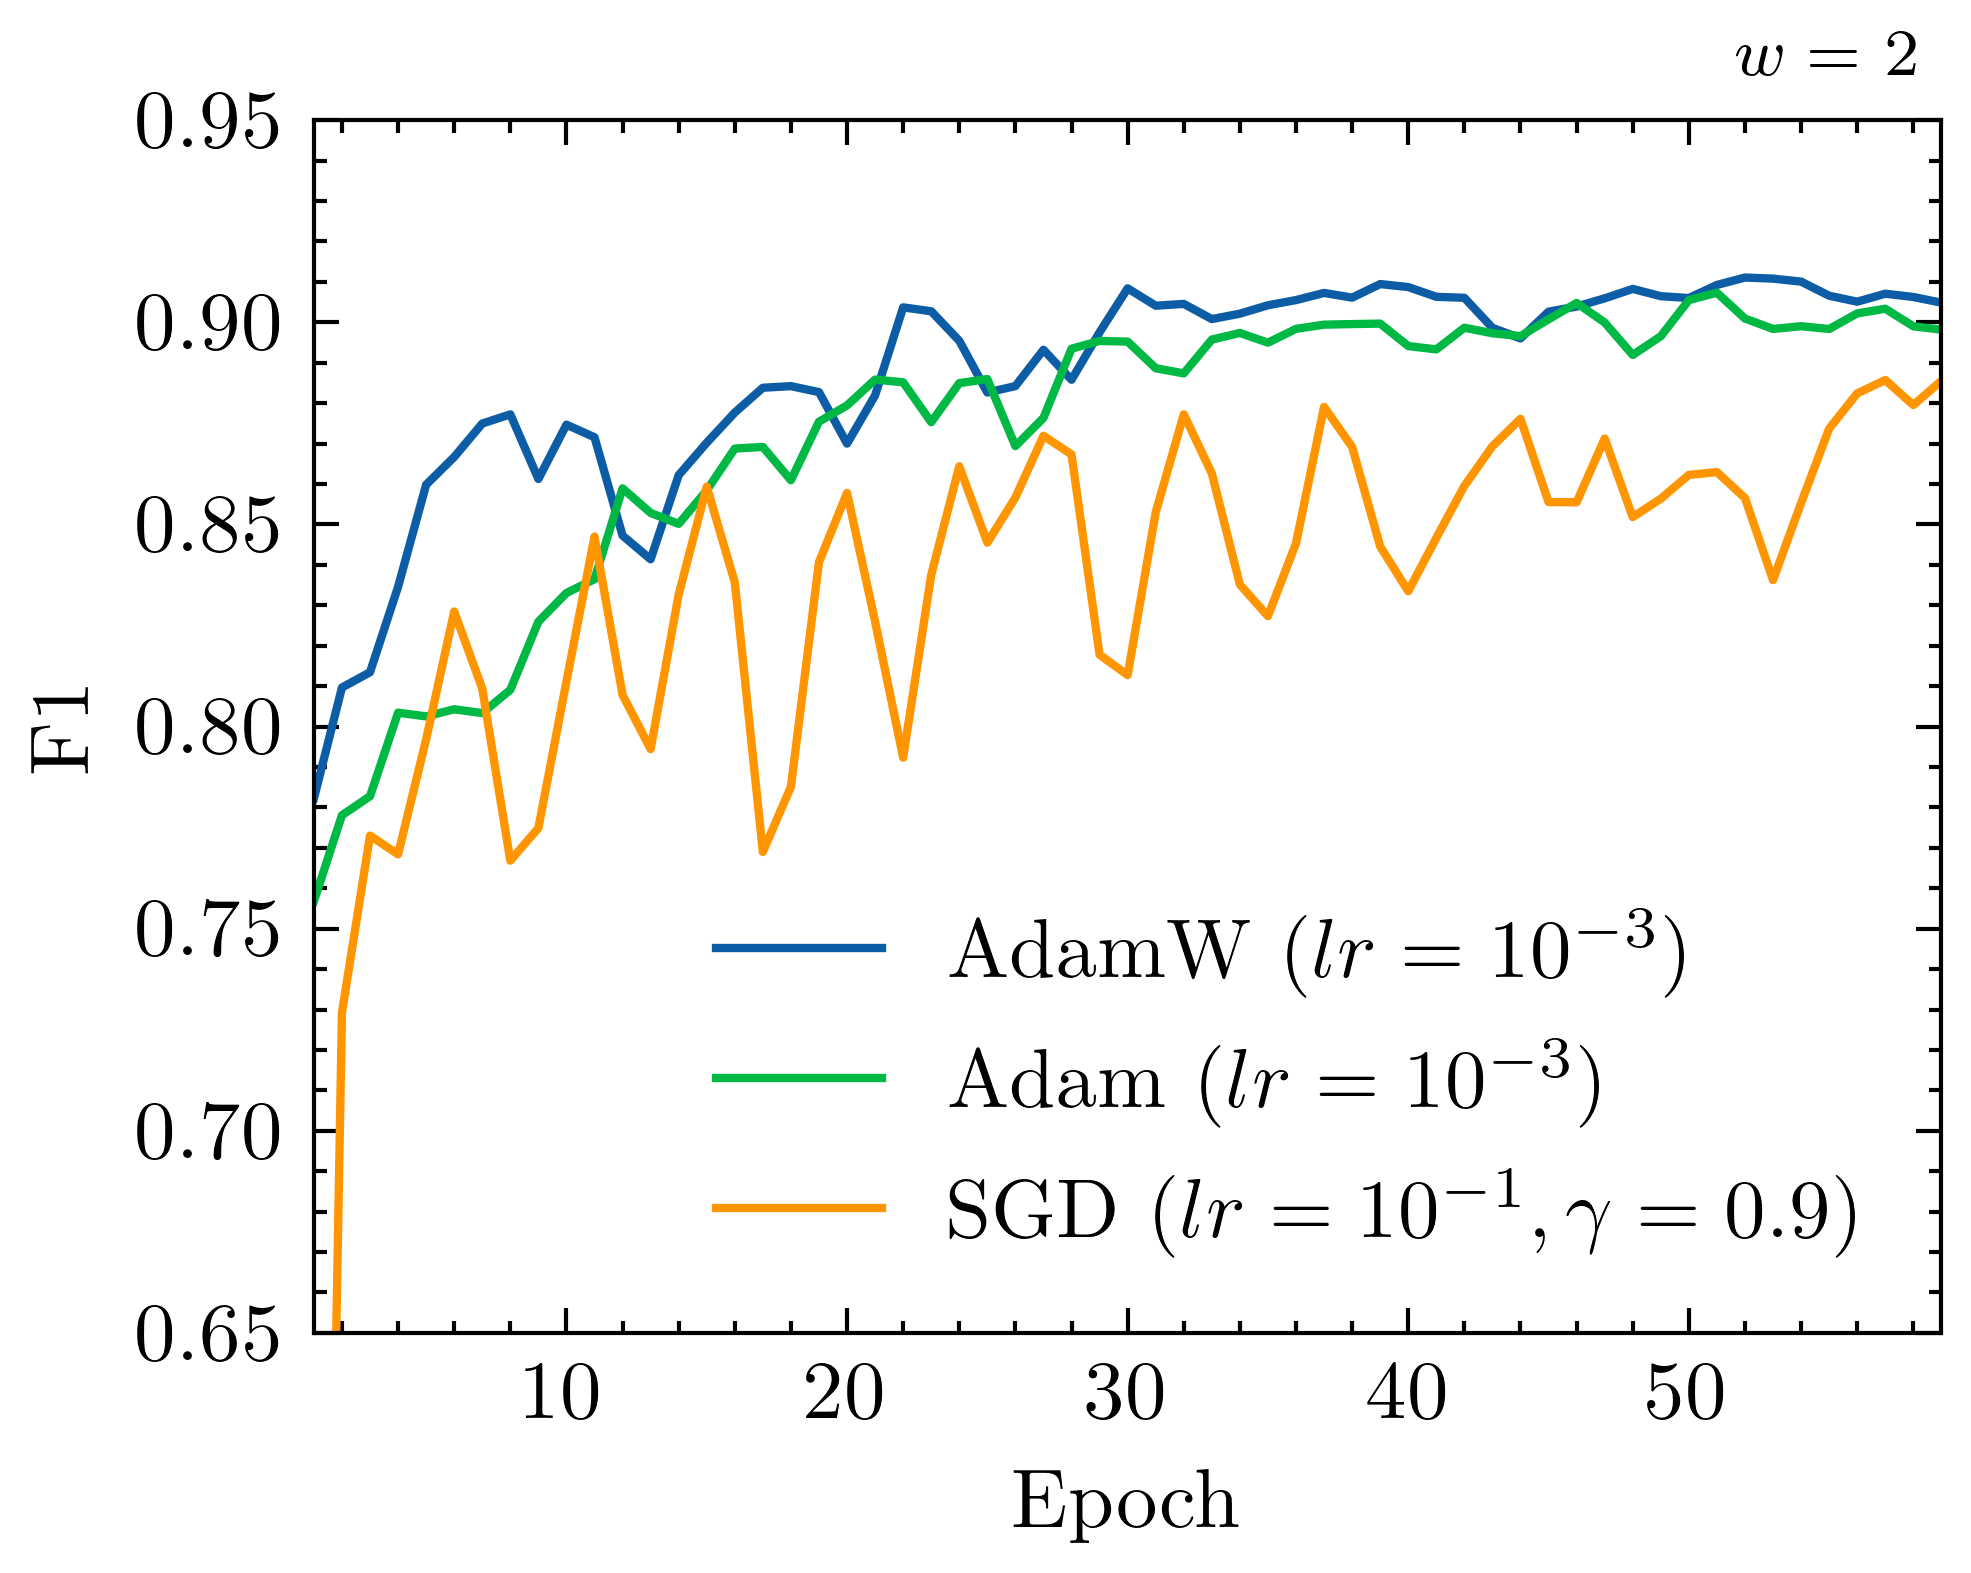

In [92]:
myplot('optimizers/f1', [r'AdamW $(lr=10^{-3})$', r'Adam $(lr=10^{-3})$', r'SGD $(lr=10^{-1}, \gamma = 0.9)$'], ylabel='F1', xlims = [0, 59], ylims=[0.65, 0.95], window = 2)

['run-AdamW-tag-test_B-AC_f1-score.csv', 'run-adam-tag-test_B-AC_f1-score.csv', 'run-sgd-tag-test_B-AC_f1-score.csv']


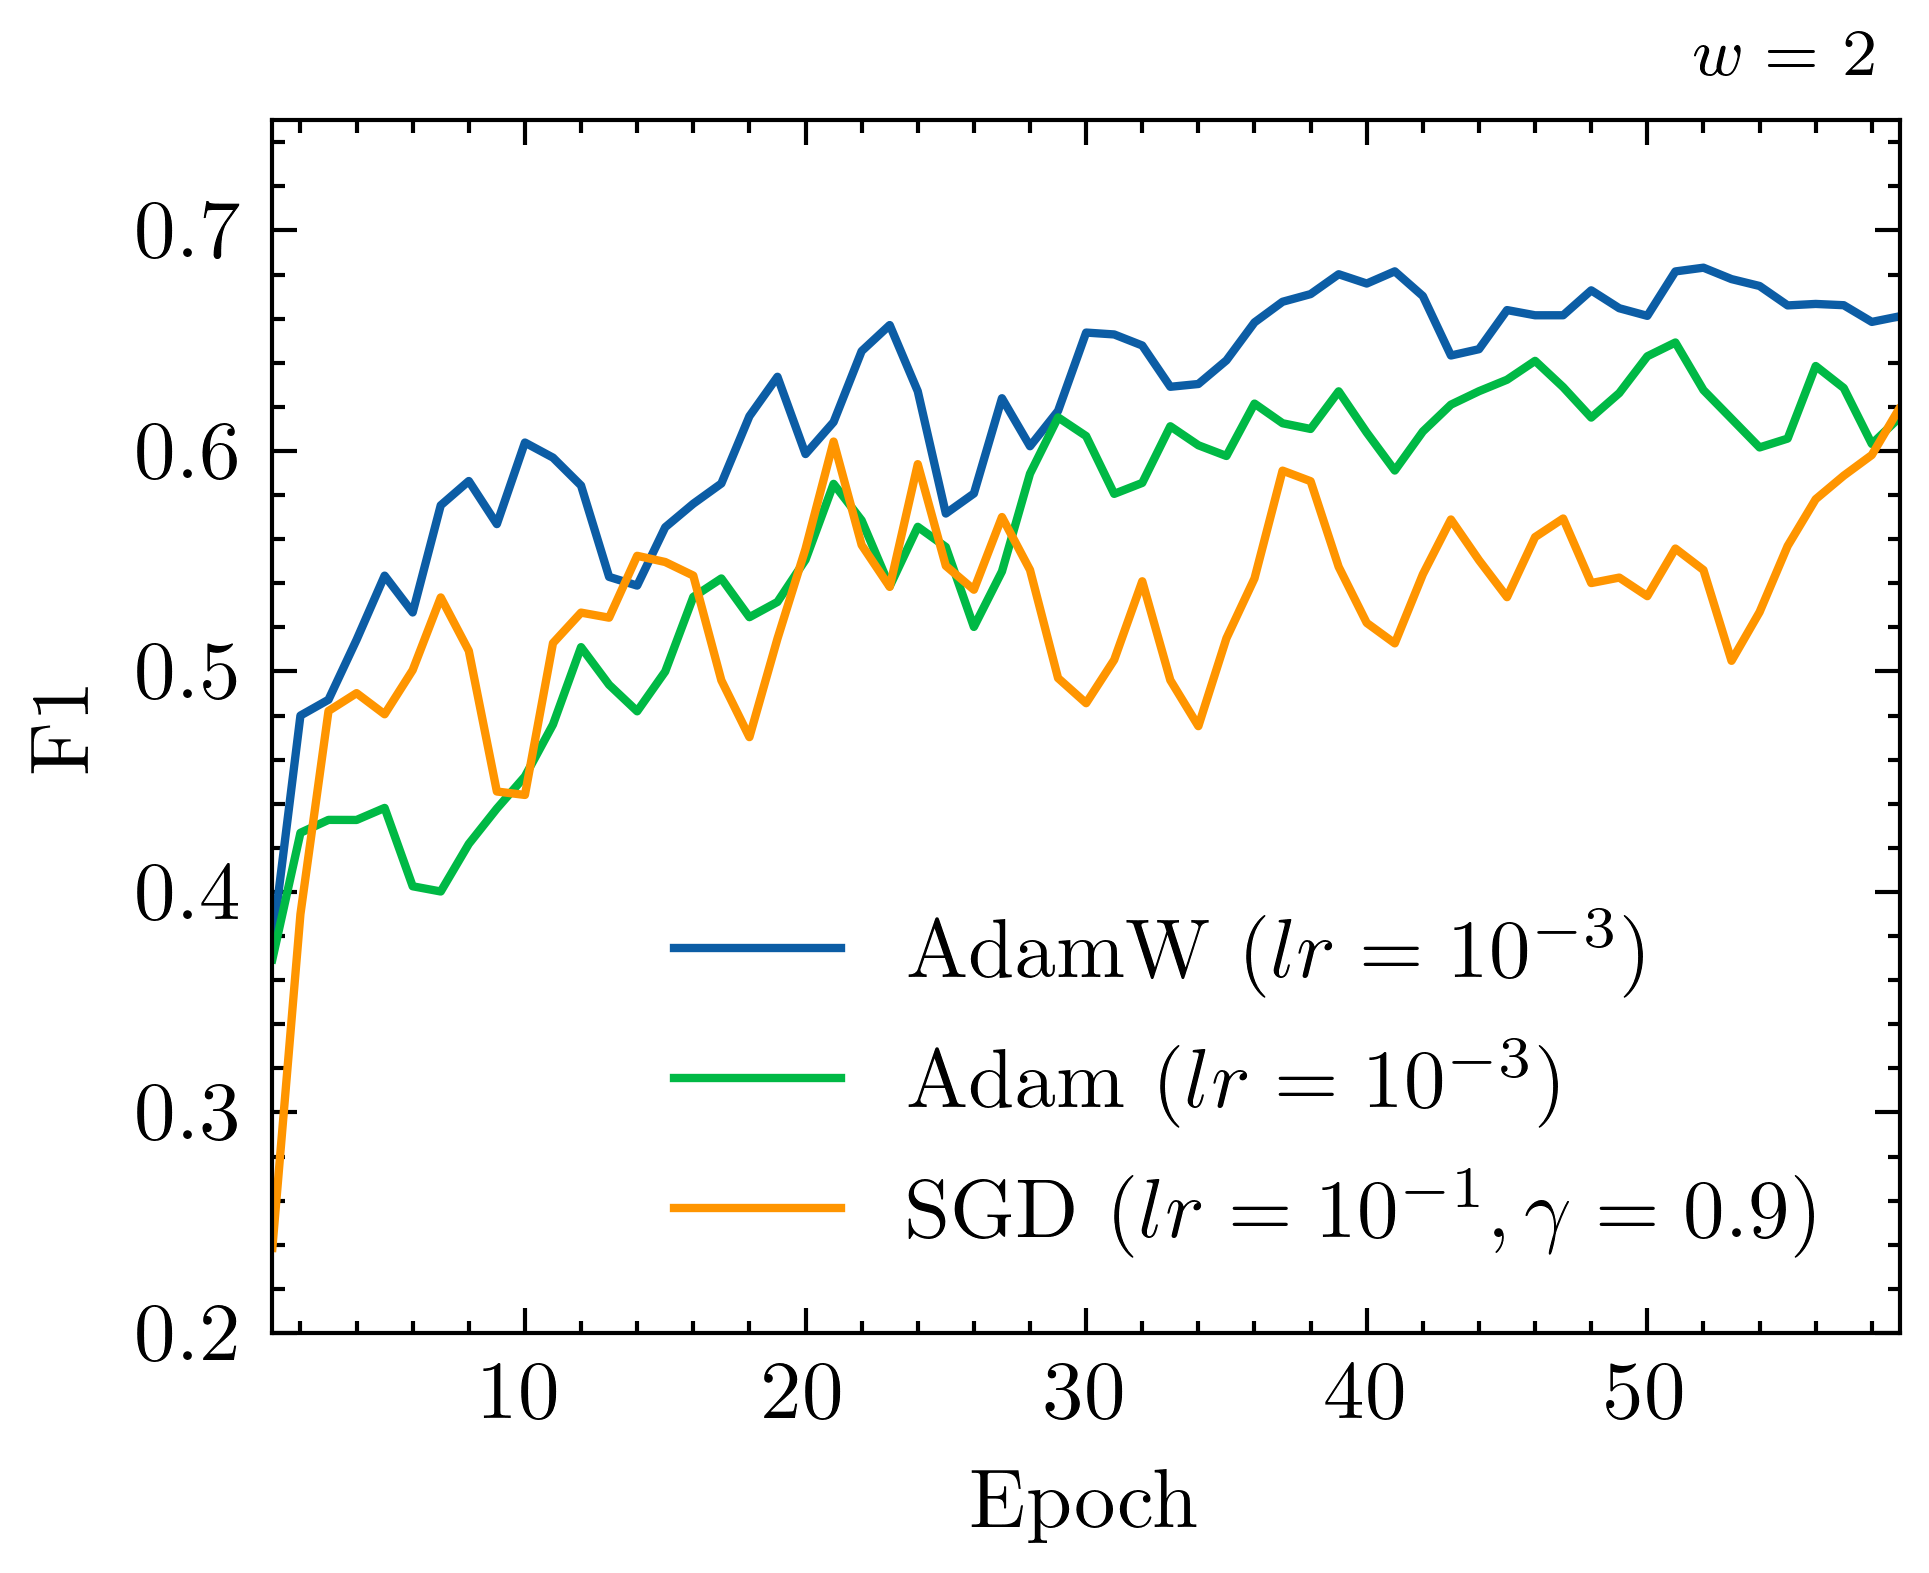

In [93]:
myplot('optimizers/acf1', [r'AdamW $(lr=10^{-3})$', r'Adam $(lr=10^{-3})$', r'SGD $(lr=10^{-1}, \gamma = 0.9)$'], ylabel='F1', xlims = [0, 59], ylims=[0.2, 0.75], window = 2)

# Batch size and lr for transformers

['run-16-tag-eval_weighted avg_f1-score.csv', 'run-32-tag-eval_weighted avg_f1-score.csv', 'run-8-tag-eval_weighted avg_f1-score.csv']


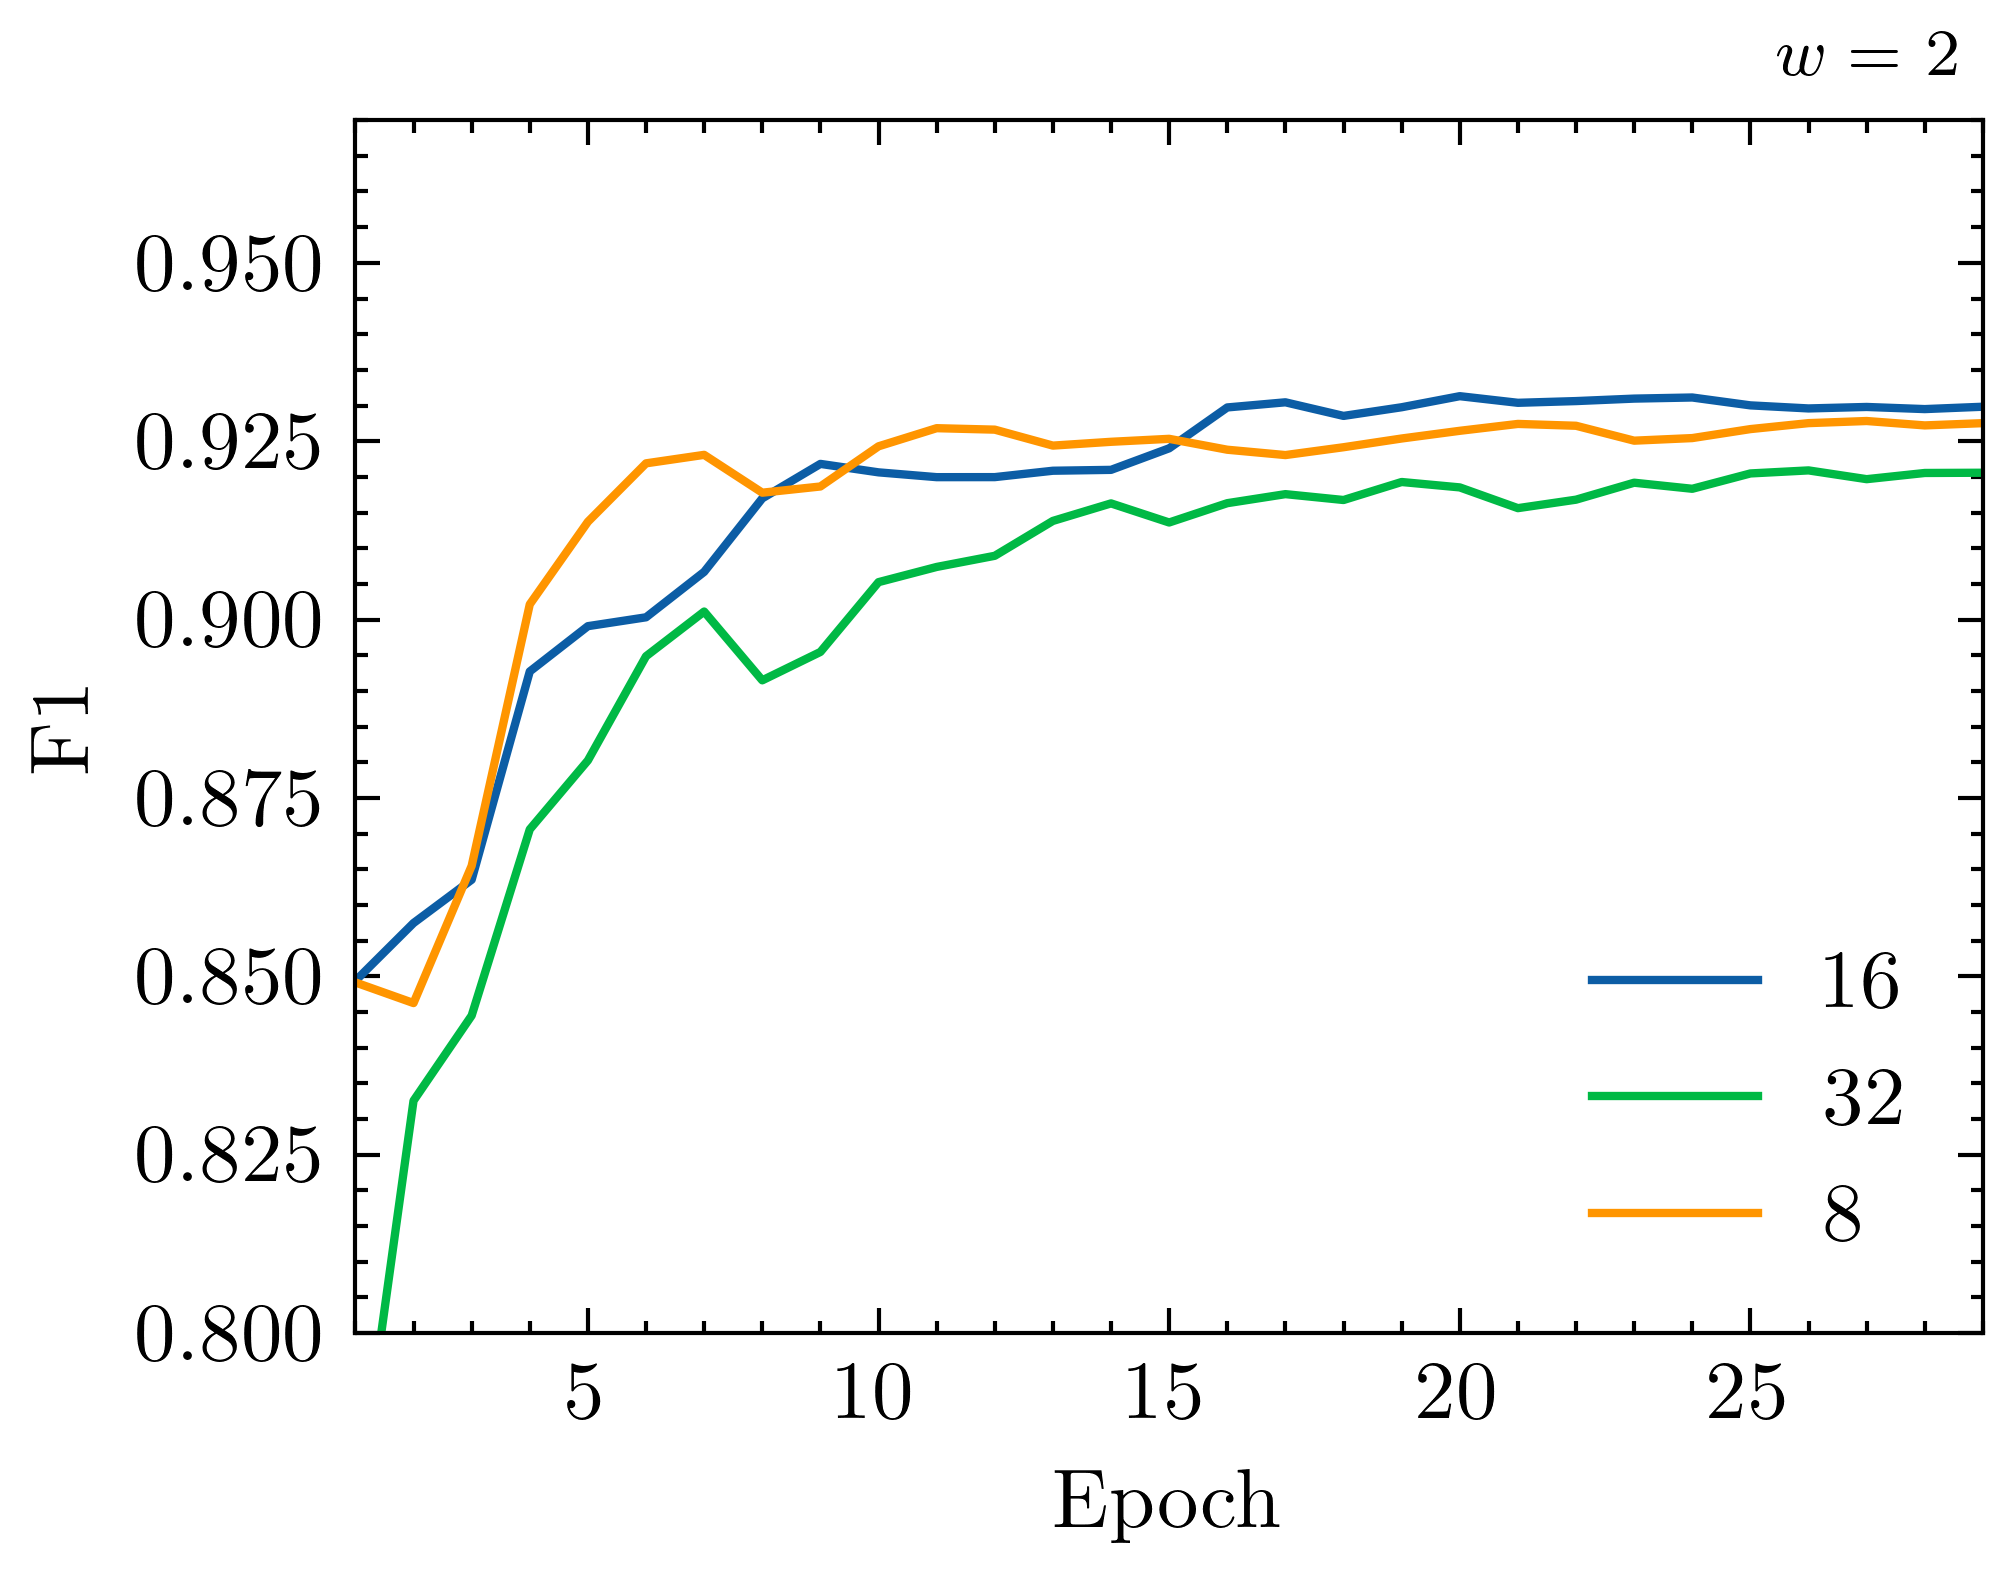

In [94]:
myplot('batch_size/f1', ['16', '32', '8'], ylabel='F1', xlims = [0, 29], ylims=[0.8, 0.97], window = 2)

['run-1e-5-tag-eval_weighted avg_f1-score.csv', 'run-2e-4-tag-eval_weighted avg_f1-score.csv', 'run-2e-5-tag-eval_weighted avg_f1-score.csv']


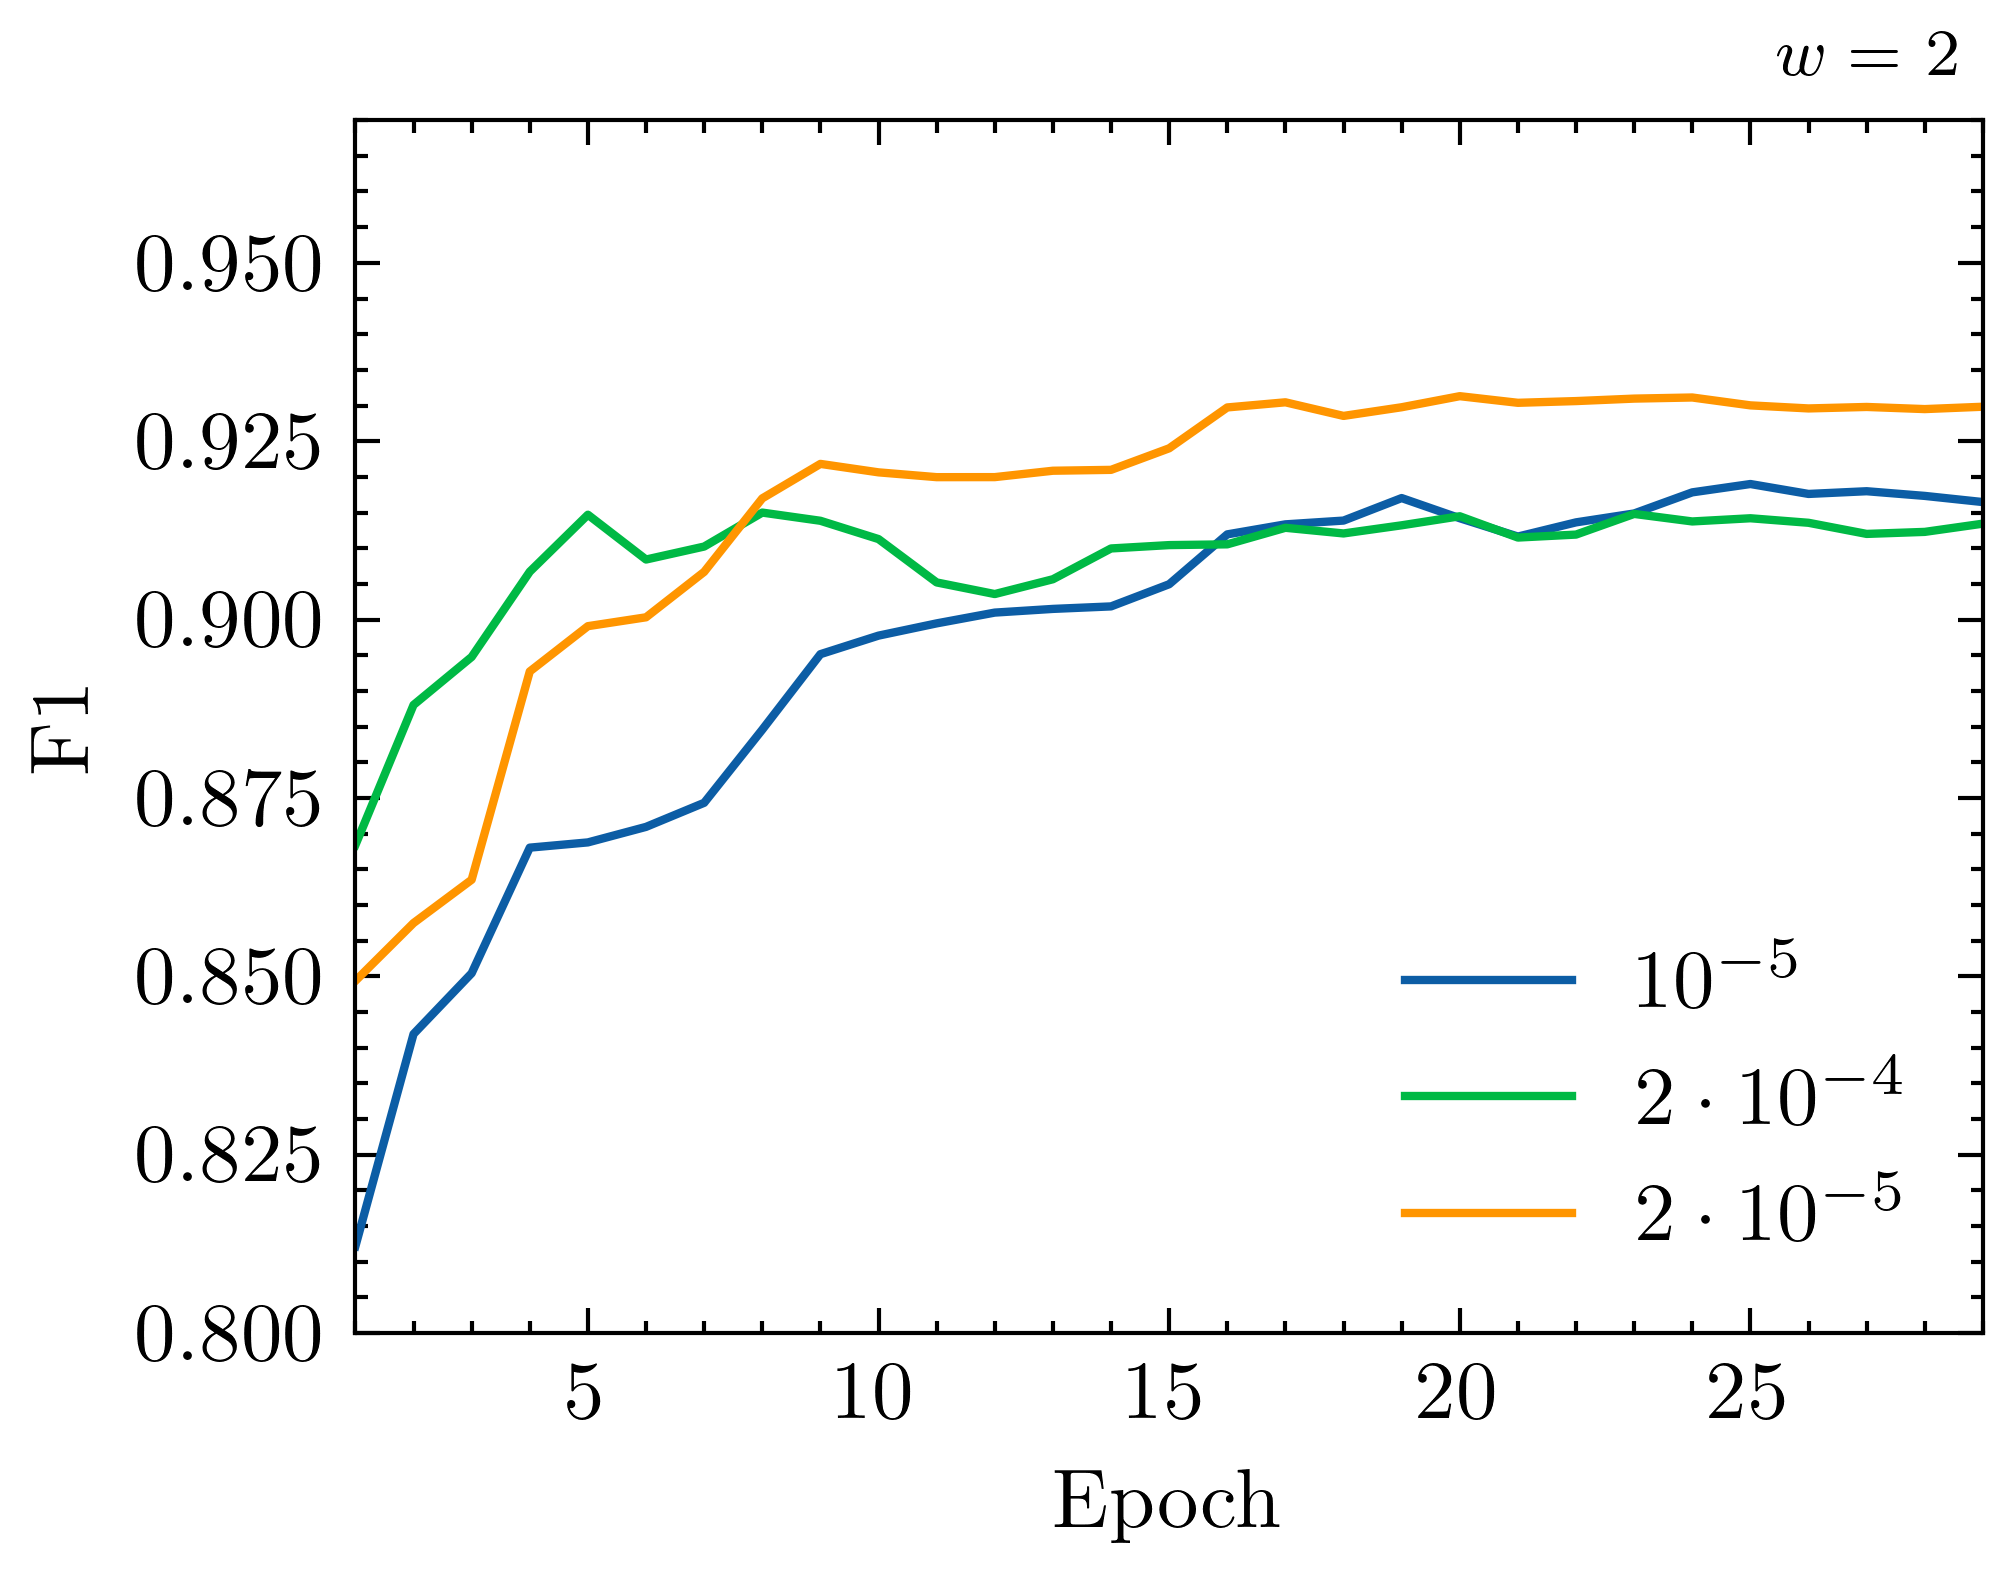

In [95]:
myplot('learning_rate/f1', [r'$10^{-5}$', '$2\cdot 10^{-4}$', '$2\cdot 10^{-5}$'], ylabel='F1', xlims = [0, 29], ylims=[0.8, 0.97], window = 2)

# Text encoding

['run-fasttext-tag-test_weighted avg_f1-score.csv', 'run-glove-tag-test_weighted avg_f1-score.csv', 'run-word2vec-tag-test_weighted avg_f1-score.csv']


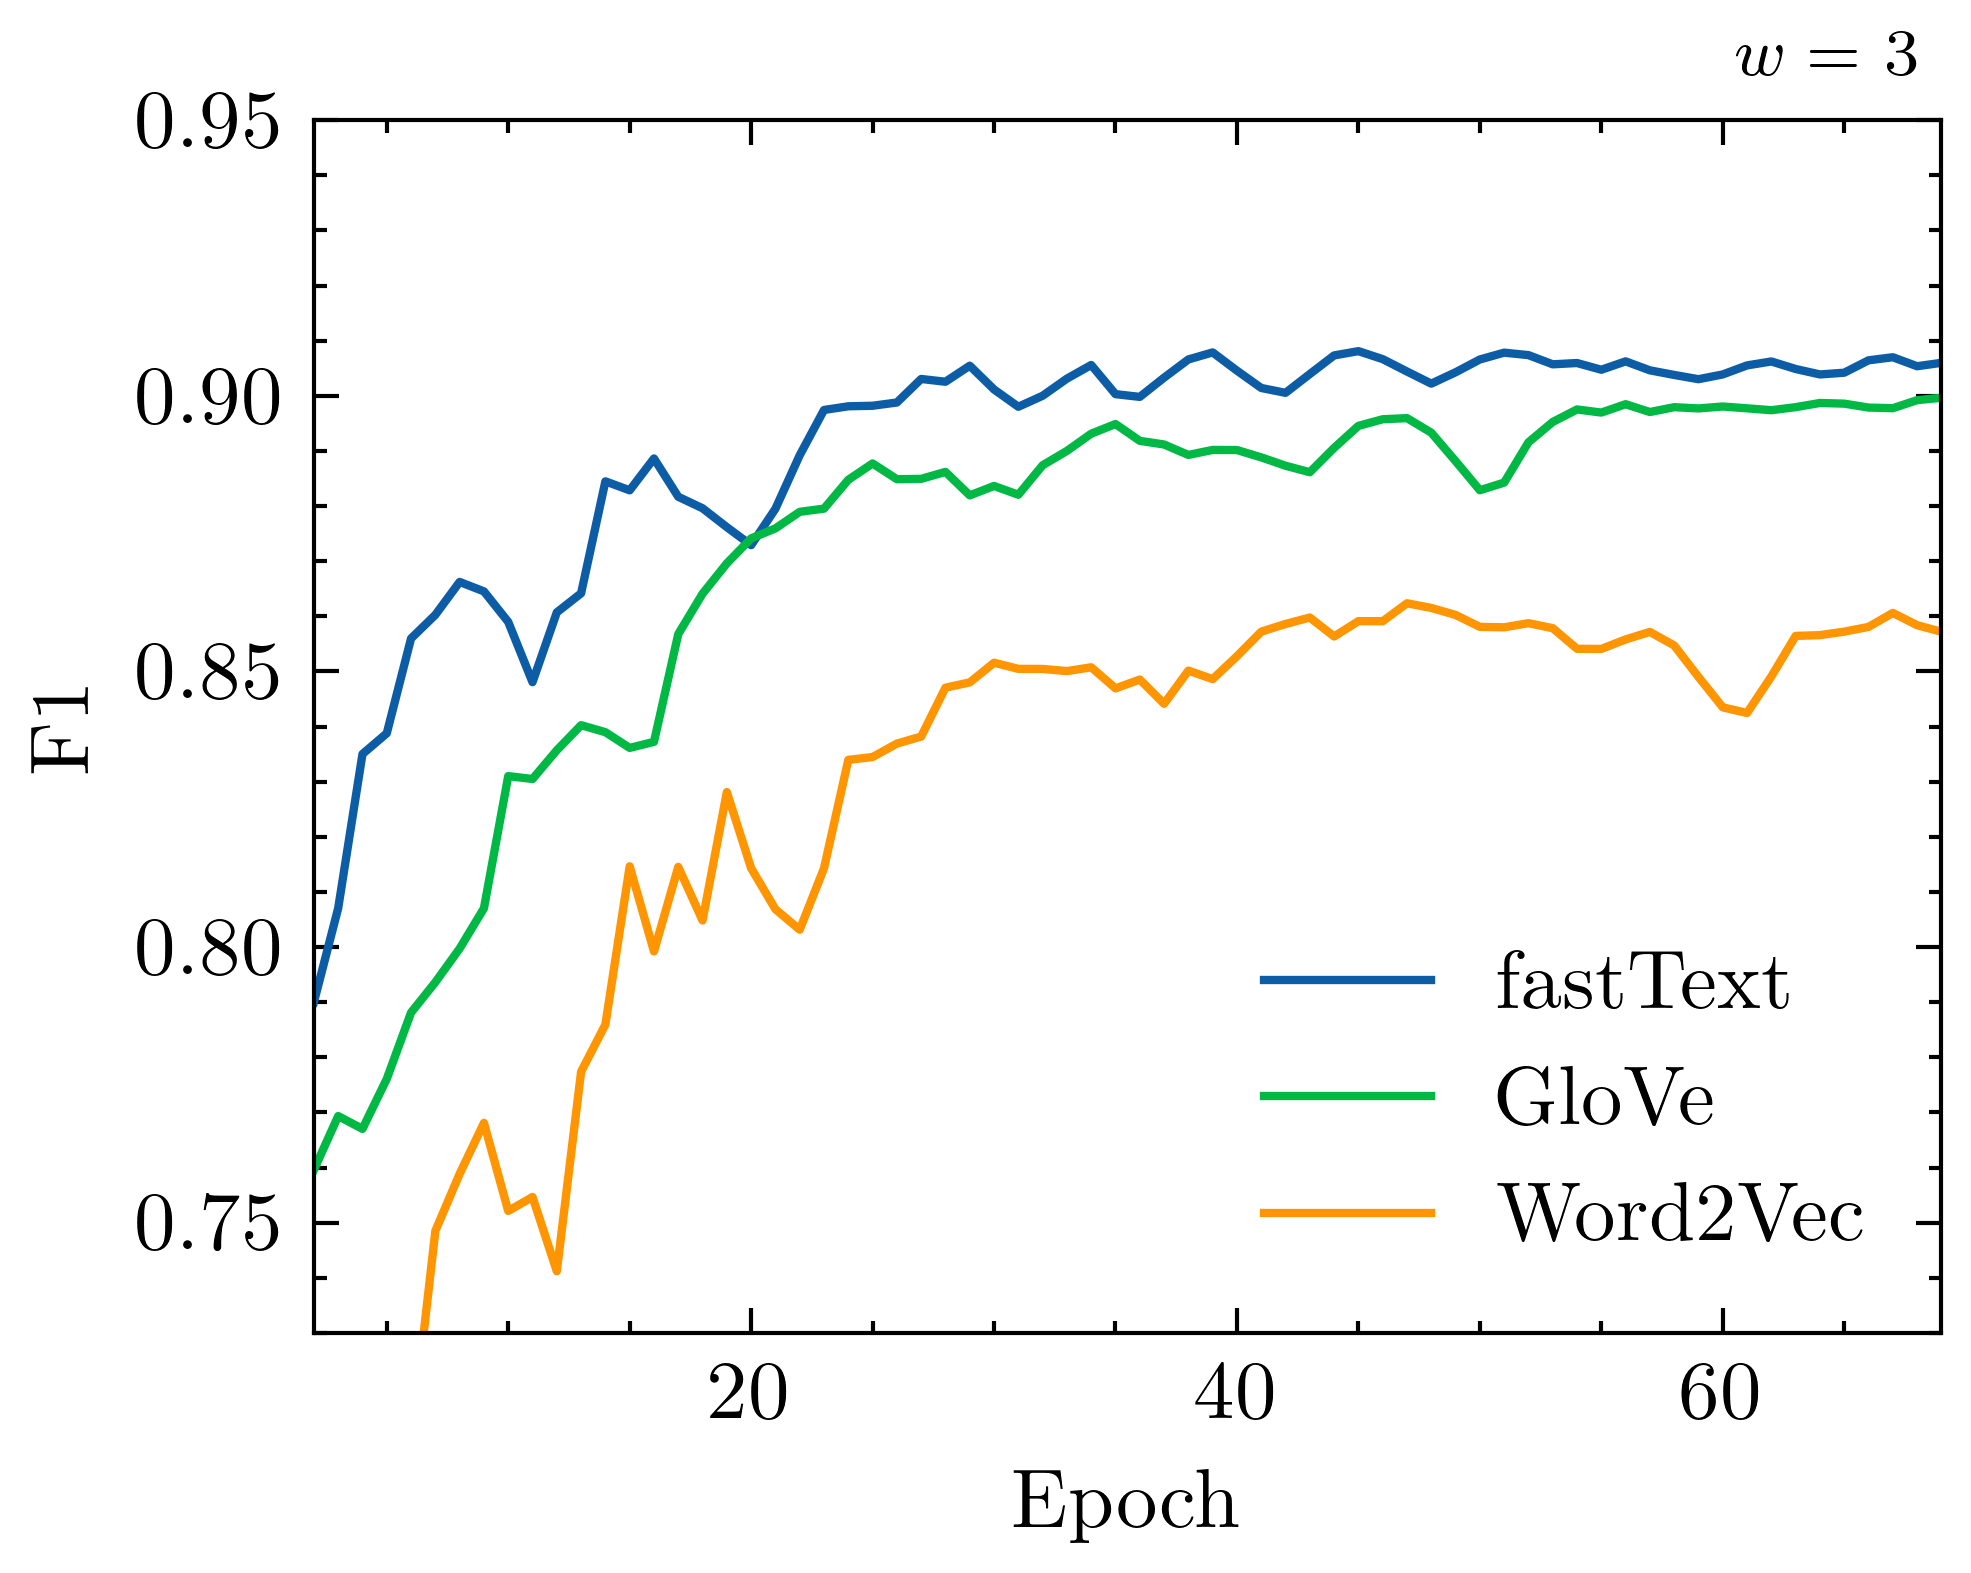

In [96]:
myplot('vectorization/f1', ['fastText', 'GloVe', 'Word2Vec'], ylabel='F1', xlims = [0, 69], ylims=[0.73, 0.95], window = 3)

['run-fasttext-tag-test_B-AC_f1-score.csv', 'run-glove-tag-test_B-AC_f1-score.csv', 'run-word2vec-tag-test_B-AC_f1-score.csv']


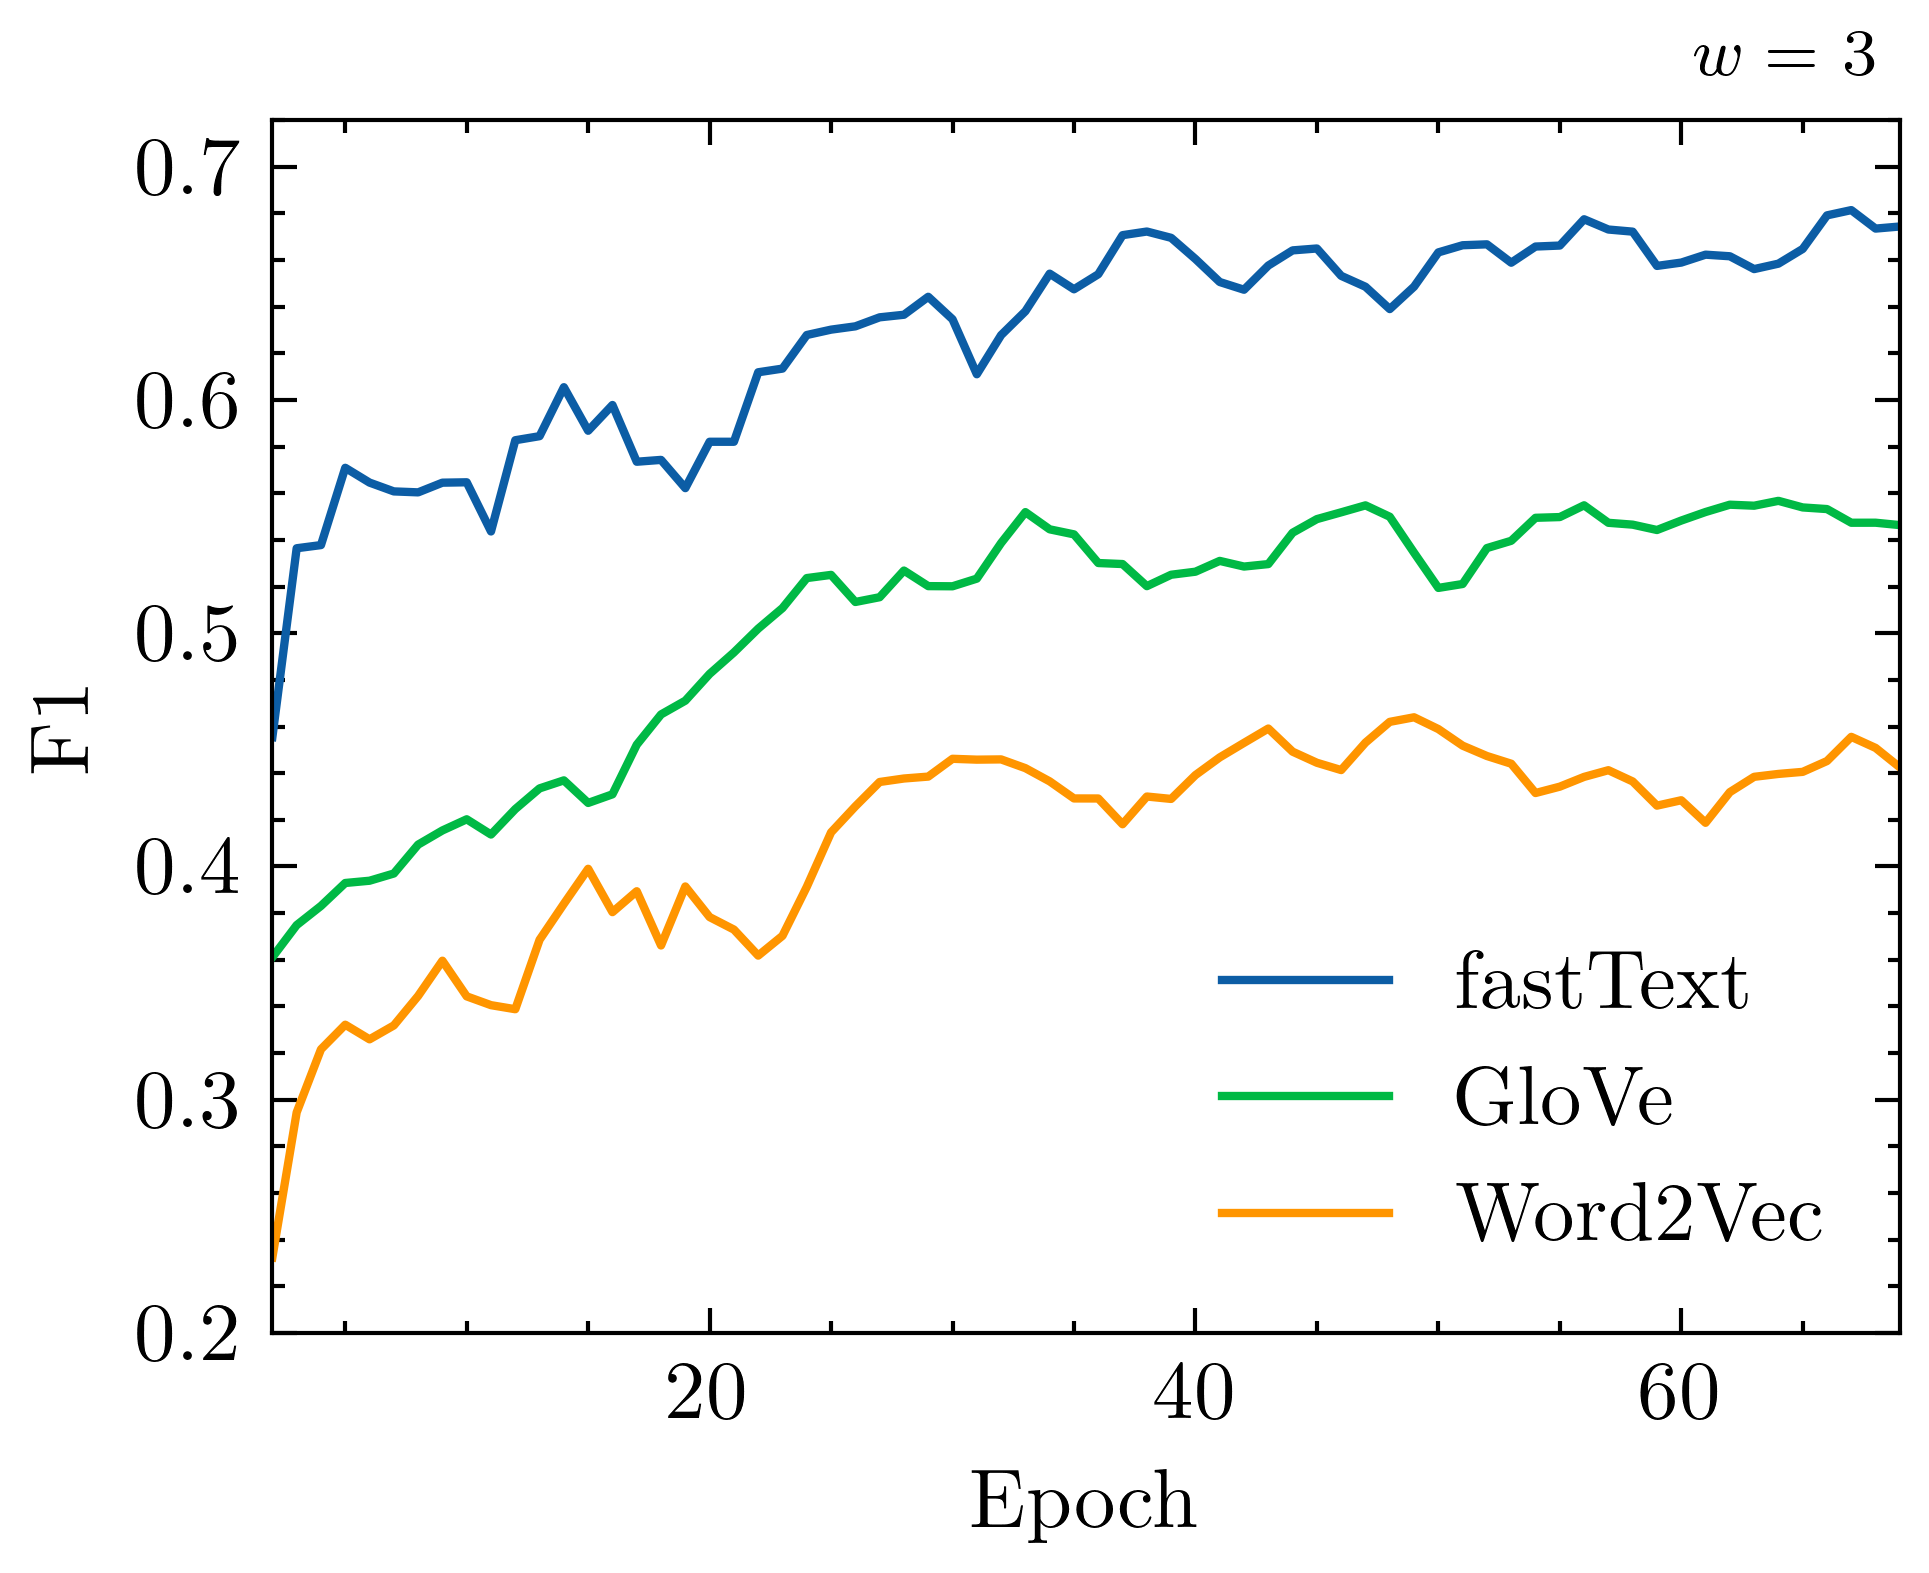

In [97]:
myplot('vectorization/acf1', ['fastText', 'GloVe', 'Word2Vec'], ylabel='F1', xlims = [0, 69], ylims=[0.2, 0.72], window = 3)